In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
lowess = sm.nonparametric.lowess
import statsmodels.formula.api as smf
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison

In [2]:
data = pd.read_csv("C:/Users/Admin/OneDrive - The University of Sydney (Students)/Desktop/QBUS2810/Assignment 2/Mydata.csv")
data['log_RV_sc_sqr'] = np.log(data['RV_sc_sqr'])

In [3]:
data.sort_values(by='Date', inplace=True)
data.set_index('Date',inplace=True)
data.head()

,r_data,rv_data_not_scaled,day_of_week,Mon,Tues,Wed,Thurs,Fri,month_yr,Summer,Autumn,Winter,Spring,Season,RV_sc_sqr,log_RV_sc_sqr
Date,,,,,,,,,,,,,,,,
2000-07-14,-0.000908,0.000016,4,0,0,0,0,1,7,0,0,1,0,3,0.398397,-0.920305
2000-07-17,0.002992,0.000026,0,1,0,0,0,0,7,0,0,1,0,3,0.509046,-0.675217
2000-07-18,-0.003871,0.000032,1,0,1,0,0,0,7,0,0,1,0,3,0.564357,-0.572068
2000-07-19,-0.000303,0.000042,2,0,0,1,0,0,7,0,0,1,0,3,0.649018,-0.432295
2000-07-21,0.009468,0.000037,4,0,0,0,0,1,7,0,0,1,0,3,0.607634,-0.498183


As the default setting of the code stats.describe(), some Kurtosis may have the negative values, which is due to the use of Fisher's kurtosis measurement, which is $E[(\frac{X-\mu}{\sigma})^{4}]-3$. Thus, the following comments on kutosis in each group will consider 0 as a benchmark for whether the kurtosis are either high or low and such kurtosis mentioned will be the Fisher's kurtosis.

## Part 1: Exploratory data analysis

<span style="color:red">Exploratory analysis for the square root of 5 min RV</span>

<AxesSubplot:xlabel='Date'>

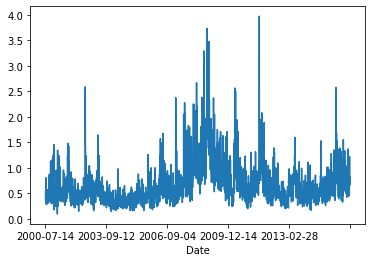

In [4]:
data['RV_sc_sqr'].plot()

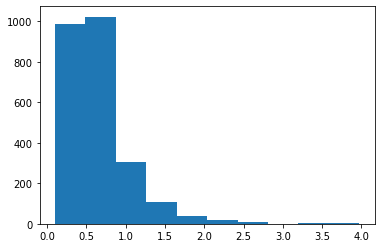

In [5]:
plt.hist(data['RV_sc_sqr'])
plt.show()

<AxesSubplot:xlabel='RV_sc_sqr', ylabel='Count'>

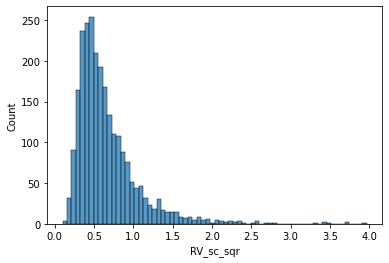

In [6]:
sns.histplot(data['RV_sc_sqr'], kde=False)

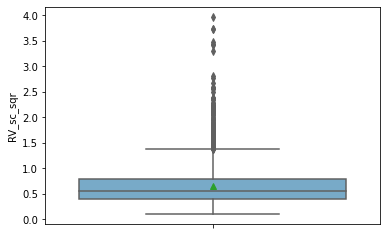

In [7]:
ax = sns.boxplot(y='RV_sc_sqr', data=data, palette='Blues', showmeans=True)

In [8]:
stats.describe(data['RV_sc_sqr'])

DescribeResult(nobs=2500, minmax=(0.09899360425299146, 3.972354140179674), mean=0.6632923904818957, variance=0.16076983570675618, skewness=2.528557168860069, kurtosis=10.710493278212448)

In [9]:
data['RV_sc_sqr'].describe()

count    2500.000000
mean        0.663292
std         0.400961
min         0.098994
25%         0.406563
50%         0.557808
75%         0.797444
max         3.972354
Name: RV_sc_sqr, dtype: float64

First of all, from the financial nature of RV, this should be regarded as a numerical variable and also a continuous random variable.

From the above numerical summary, it can be seen that among 2500 RV values for 2500 provided observations, there is a significant difference between the maximum RV and the minimum one at 3.87% (3.97%-0.10%) and almost 40 times (3.87%/0.10%) higher. Additionally, the mean RV value for the sample is observed at 0.66% and the standard deviation also reaches a level of 0.40% , which lead to coefficient of variation (i.e $CV=\frac{S}{\bar{X}} \times 100$) recorded as 60.61%. Moreover, the 25, 50, and 75 percentile are reported to be approximately 0.41%, 0.56%,and 0.80% respectively. Thus, the resulting interquartile range is around 0.39%.

According to the histogram and the boxplot, it has been recognized the expected right skewness of the RV distribution. Besides, by examining the skewness of 2.5285571688600696 and kurtosis of 10.710493278212446, the distribution of RV should be right-skewed and loptokurtic. Thus, RV distribution is extremely right, i.e positively skewed variable. Other than that, there are some possible outliers in the long right tail of the distribution, above about 1.5%, according from the boxplot. Turning to the histogram, most of the values concentrates within the range from 0.41% to just below 1.5% and the minority group of RV values (i.e outlying data) is spreaded from just over 1.5% to 3.97%. 

In spite of being regarded as minority group, according to the boxplot, the outliers in this sample tend to appear more than just accidentally due to its high frequency and thus, contribute to the extreme right skewness of the RV distribution. Thus, the finite value of the mean and the variance needs to be cautiously assessed. 

From the time series plot, RV displays a strong pattern over time: there are periods of persistent high volatility and at other times periods of  persistent low volatility. High values of RV tend to follow high values of RV; and vice versa. 

<span style="color:red">Exploratory analysis for day of the week</span>

In [10]:
stats.describe(data['day_of_week'])

DescribeResult(nobs=2500, minmax=(0, 4), mean=1.9748, variance=1.9573478991596636, skewness=0.026429621984297665, kurtosis=-1.2762844079583047)

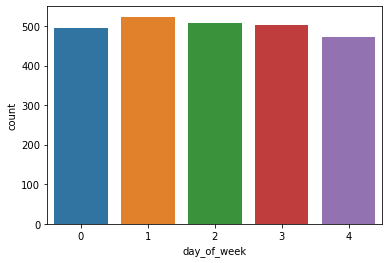

In [11]:
ax = sns.countplot(x='day_of_week', data=data)

In [12]:
data.loc[data['day_of_week']==0,'RV_sc_sqr'].count(), data.loc[data['day_of_week']==1,'RV_sc_sqr'].count(), data.loc[data['day_of_week']==2,'RV_sc_sqr'].count(), data.loc[data['day_of_week']==3,'RV_sc_sqr'].count(), data.loc[data['day_of_week']==4,'RV_sc_sqr'].count()

(494, 523, 508, 502, 473)

First of all, it should be noticed that value of 0 is assigned for any day that is monday. In a similar manner, the numbers 1,2,3,4 are assigned to Tuesday, Wednesday, Thursday, and Friday respectively.

Day of the week variable, in spite of being represented by numbers 0,1,2,3,4, must be regarded as a categorical and also a nominal random variable.

From the numerical summary, in the provided sample, we have 494 observations from Monday, 523 observations from Tuesday, 508 observations from Wednesday, 502 observations from Thursday, and 473 oberservations from Friday. Hence, the data comes evenly from 5 days of the week, which can prevent any over representation in our later interpretation and inference.

<span style="color:red">Exploratory analysis for season of the year</span>

In [13]:
stats.describe(data['Season'])

DescribeResult(nobs=2500, minmax=(1, 4), mean=2.516, variance=1.2342376950780312, skewness=-0.015779549356396597, kurtosis=-1.3431123872405983)

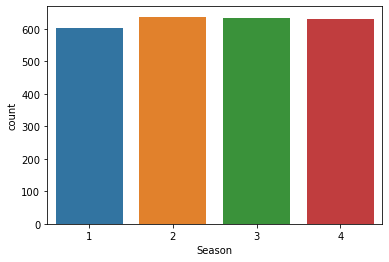

In [14]:
ax = sns.countplot(x='Season', data=data)

In [15]:
data.loc[data['Season']==1,'RV_sc_sqr'].count(), data.loc[data['Season']==2,'RV_sc_sqr'].count(), data.loc[data['Season']==3,'RV_sc_sqr'].count(), data.loc[data['Season']==4,'RV_sc_sqr'].count()

(601, 637, 633, 629)

First of all, it should be noticed that value of 1 is assigned for any day that is in Summer . In a similar manner, the numbers 2,3,4 are assigned to Autumn, Winter, and Spring respectively.

Season of  the year variable, in spite of being represented by numbers 1,2,3,4, must be regarded as a categorical and also a nominal random variable.

From the numerical summary, in the provided 2500 days' data, we have 601 observations from Summer, 637 observations from Autumn, 633 observations from Winter, and 629 observations from Spring. Hence, the data comes evenly from 4 seasons of the year, which can prevent any over representation in our later interpretation and inference.

<span style="color:red">Exploratory analysis for relationship between day of the week and the square root of 5 min RV
</span>

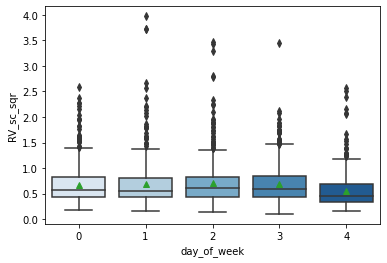

In [16]:
ax = sns.boxplot(x='day_of_week', y='RV_sc_sqr', data=data, palette='Blues', showmeans=True)

In [17]:
stats.describe(data.loc[data['Mon'] == 1, 'RV_sc_sqr'])

DescribeResult(nobs=494, minmax=(0.17781973316971122, 2.588705320670433), mean=0.6769192095630774, variance=0.14681615406221565, skewness=1.802749461633119, kurtosis=4.096893795806295)

In [18]:
data.loc[data['Mon'] == 1, 'RV_sc_sqr'].describe()

count    494.000000
mean       0.676919
std        0.383166
min        0.177820
25%        0.426537
50%        0.563251
75%        0.818781
max        2.588705
Name: RV_sc_sqr, dtype: float64

In [19]:
stats.describe(data.loc[data['Tues'] == 1, 'RV_sc_sqr'])

DescribeResult(nobs=523, minmax=(0.16414632582293032, 3.972354140179674), mean=0.6826682117516948, variance=0.19440123414356433, skewness=3.183767048426224, kurtosis=15.760475066381744)

In [20]:
data.loc[data['Tues'] == 1, 'RV_sc_sqr'].describe()

count    523.000000
mean       0.682668
std        0.440910
min        0.164146
25%        0.423333
50%        0.556359
75%        0.808012
max        3.972354
Name: RV_sc_sqr, dtype: float64

In [21]:
stats.describe(data.loc[data['Wed'] == 1, 'RV_sc_sqr'])

DescribeResult(nobs=508, minmax=(0.14593661524433268, 3.476574804127217), mean=0.6996954932949411, variance=0.18185394929647822, skewness=2.8216414525715683, kurtosis=11.792398112367541)

In [22]:
data.loc[data['Wed'] == 1, 'RV_sc_sqr'].describe()

count    508.000000
mean       0.699695
std        0.426443
min        0.145937
25%        0.438688
50%        0.602435
75%        0.815977
max        3.476575
Name: RV_sc_sqr, dtype: float64

In [23]:
stats.describe(data.loc[data['Thurs'] == 1, 'RV_sc_sqr'])

DescribeResult(nobs=502, minmax=(0.09899360425299146, 3.442913078670329), mean=0.6957963344053396, variance=0.1493106938272709, skewness=1.8590918021931961, kurtosis=5.879884796630723)

In [24]:
data.loc[data['Thurs'] == 1, 'RV_sc_sqr'].describe()

count    502.000000
mean       0.695796
std        0.386407
min        0.098994
25%        0.425119
50%        0.598843
75%        0.842026
max        3.442913
Name: RV_sc_sqr, dtype: float64

In [25]:
stats.describe(data.loc[data['Fri'] == 1, 'RV_sc_sqr'])

DescribeResult(nobs=473, minmax=(0.15157873264355987, 2.5656397590835023), mean=0.5540430052201519, variance=0.11390742858897021, skewness=2.34150709545833, kurtosis=8.50359116632589)

In [26]:
data.loc[data['Fri'] == 1, 'RV_sc_sqr'].describe()

count    473.000000
mean       0.554043
std        0.337502
min        0.151579
25%        0.332184
50%        0.458785
75%        0.686652
max        2.565640
Name: RV_sc_sqr, dtype: float64

From the side-by-side boxplots, it can be seen that the five numerical summary of RV distribution in Monday, Tuesday, Wednesday, and Thursday are quite similar while that of Friday seems to be significantly lower than the others. Other than that, from the histogram, all these five distributions all have very right skewness and subject to considerable numbers of outliers.

To examine the difference quantitatively, the mean RV values for Monday, Tuesday, Wednesday, Thursday, and Friday are 0.68%, 0.68%, 0.70%, 0.70%, and 0.55% respectively, which reflects the similarities of mean RV values across the first 4 days of the week and highlights the inferiority of mean RV values of Friday as compared to that of the previous 4 days. Furthermore, the same discoveried pattern can be also oberseved as considering the median RV values of the 5 days (0.56%, 0.56%, 0.60%, 0.60%, and 0.46%).

Although there is a difference of RV values in Friday as compared to the other days of the week, the impact of day of the week on the square root of 5 min RV seems to be insignificant as evaluating informally. The boxplots illustrate humbly significant marginal effects of each category predictor on the square root of 5 min RV.

<span style="color:red">Exploratory analysis for relationship between season of the year and the square root of 5 min RV
</span>

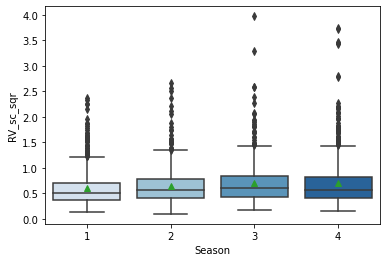

In [27]:
ax = sns.boxplot(x='Season', y='RV_sc_sqr', data=data, palette='Blues', showmeans=True)

In [28]:
stats.describe(data.loc[data['Summer'] == 1, 'RV_sc_sqr'])

DescribeResult(nobs=601, minmax=(0.14593661524433268, 2.377113745955564), mean=0.6061528370001942, variance=0.13284075184157654, skewness=1.8668554095719934, kurtosis=4.2002642640547885)

In [29]:
data.loc[data['Summer'] == 1, 'RV_sc_sqr'].describe()

count    601.000000
mean       0.606153
std        0.364473
min        0.145937
25%        0.367008
50%        0.501545
75%        0.710157
max        2.377114
Name: RV_sc_sqr, dtype: float64

In [30]:
stats.describe(data.loc[data['Autumn'] == 1, 'RV_sc_sqr'])

DescribeResult(nobs=637, minmax=(0.09899360425299146, 2.6701594554810617), mean=0.6500693410845713, variance=0.11705986299010045, skewness=2.0811283733320587, kurtosis=6.854220201843347)

In [31]:
data.loc[data['Autumn'] == 1, 'RV_sc_sqr'].describe()

count    637.000000
mean       0.650069
std        0.342140
min        0.098994
25%        0.415261
50%        0.566565
75%        0.789247
max        2.670159
Name: RV_sc_sqr, dtype: float64

In [32]:
stats.describe(data.loc[data['Winter'] == 1, 'RV_sc_sqr'])

DescribeResult(nobs=633, minmax=(0.16742626189733528, 3.972354140179674), mean=0.6964481911385064, variance=0.15819219312872743, skewness=2.5290789002959877, kurtosis=11.996324798696621)

In [33]:
data.loc[data['Winter'] == 1, 'RV_sc_sqr'].describe()

count    633.000000
mean       0.696448
std        0.397734
min        0.167426
25%        0.435890
50%        0.612434
75%        0.842058
max        3.972354
Name: RV_sc_sqr, dtype: float64

In [34]:
stats.describe(data.loc[data['Spring'] == 1, 'RV_sc_sqr'])

DescribeResult(nobs=629, minmax=(0.1644602264513405, 3.733462153433888), mean=0.6979129505660984, variance=0.22947206731542763, skewness=2.7744033952547618, kurtosis=10.889638070016332)

In [35]:
data.loc[data['Spring'] == 1, 'RV_sc_sqr'].describe()

count    629.000000
mean       0.697913
std        0.479032
min        0.164460
25%        0.406652
50%        0.559652
75%        0.818822
max        3.733462
Name: RV_sc_sqr, dtype: float64

From the side-by-side boxplots, it can be seen that the five numerical summary of RV distribution in Summer, Autumn, Winter, and Spring are quite similar although that of Summer and Autumn seem to be slightly lower than the others. Other than that, from the histogram, all these four distributions all have very right skewness and subject to considerable numbers of outliers.

To examine the difference quantitatively, the mean RV values for Summer, Autumn, Winter, and Spring are 0.61%, 0.65%, 0.70%, and 0.70% respectively, which reflects the similarities of mean RV values across the later 2 seasons of the year and highlights the inferiority of mean RV values of Summer and Autumn as compared to that of Winter and Spring. Furthermore, the same discoveried pattern can be also oberseved as considering the median RV values of 4 mentioned seasons (0.50%, 0.57%, 0.61%, and 0.60%).

Although there is a difference of RV values in the first half of the year and the later half one, the impact of day of the week on the square root of 5 min RV seems to be insignificant with the above informal exploratory analysis. The boxplots illustrate humbly significant marginal effects of each category predictor on the square root of 5 min RV.

<span style="color:red">Exploratory analysis for the log of the square root of 5 min RV</span>

<AxesSubplot:xlabel='Date'>

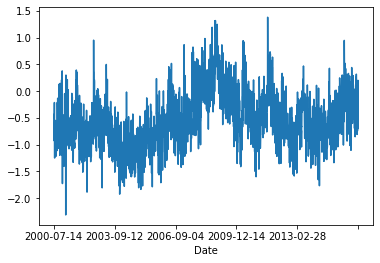

In [36]:
data['log_RV_sc_sqr'].plot()

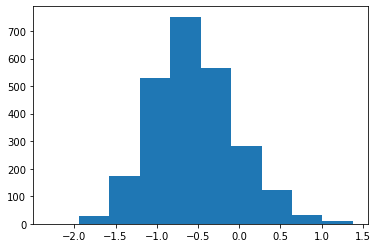

In [37]:
plt.hist(data['log_RV_sc_sqr'])
plt.show()

<AxesSubplot:xlabel='log_RV_sc_sqr', ylabel='Count'>

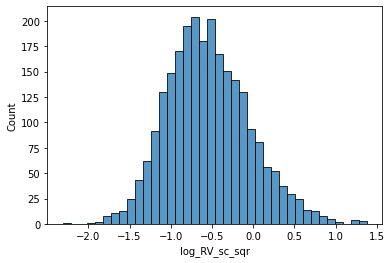

In [38]:
sns.histplot(data['log_RV_sc_sqr'], kde=False)

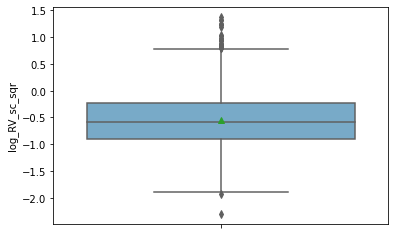

In [39]:
ax = sns.boxplot(y='log_RV_sc_sqr', data=data, palette='Blues', showmeans=True)

In [40]:
stats.describe(data['log_RV_sc_sqr'])

DescribeResult(nobs=2500, minmax=(-2.31270003443958, 1.3793589013675163), mean=-0.5474162628231262, variance=0.2559382696786862, skewness=0.38635021411563086, kurtosis=0.27106144709941704)

In [41]:
data['log_RV_sc_sqr'].describe()

count    2500.000000
mean       -0.547416
std         0.505903
min        -2.312700
25%        -0.900017
50%        -0.583741
75%        -0.226343
max         1.379359
Name: log_RV_sc_sqr, dtype: float64

After such transformation, the distribution has become more symmetric due to the skewness of approximately 0.39. On the other hand, the influence of outliers in the original data has been reduced significantly via the kurtosis of around 0.27. Specifically, most of observations have value within the range of -1.5 to 0.5 while the remaining outliers have values either below -1.5 or above 0.5. Hence, after transformation, the finite value of forth momemnt of log of square root of 5 min RV may be reasonably ensured, which leads to finite mean and variance.

From the above numerical summary, it can be seen that among 2500 log of RV values for 2500 provided observations, there is a significant difference between the maximum RV and the minimum one at 3.69 (i.e 1.38-(-2.31)). Additionally, the meanlog of RV value for the sample is observed at -0.55 and the standard deviation also reaches a level of 0.51 , which lead to coefficient of variation (i.e $CV=\frac{S}{\bar{X}} \times 100$) recorded as -92.73%. Moreover, the 25, 50, and 75 percentile are reported to be approximately -0.90, -0.58,and -0.23 respectively. Thus, the resulting interquartile range is around 0.67.

From the time series plot, the log of RV displays a strong pattern over time: there are periods of persistent high volatility and at other times periods of  persistent low volatility. High values of the log of RV tend to follow high values of the log of RV; and vice versa. 

<span style="color:red">Exploratory analysis for relationship between day of the week and the log of the square root of 5 min RV</span>

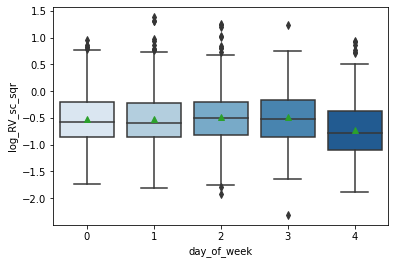

In [42]:
ax = sns.boxplot(x='day_of_week', y='log_RV_sc_sqr', data=data, palette='Blues', showmeans=True)

In [43]:
stats.describe(data.loc[data['Mon'] == 1, 'log_RV_sc_sqr'])

DescribeResult(nobs=494, minmax=(-1.7269849768542604, 0.9511578745426709), mean=-0.5202571603154437, variance=0.24755071002995277, skewness=0.34311530809078017, kurtosis=-0.08456199135776332)

In [44]:
data.loc[data['Mon'] == 1, 'log_RV_sc_sqr'].describe()

count    494.000000
mean      -0.520257
std        0.497545
min       -1.726985
25%       -0.852056
50%       -0.574031
75%       -0.199944
max        0.951158
Name: log_RV_sc_sqr, dtype: float64

In [45]:
stats.describe(data.loc[data['Tues'] == 1, 'log_RV_sc_sqr'])

DescribeResult(nobs=523, minmax=(-1.8069970183314585, 1.3793589013675163), mean=-0.5194687843703798, variance=0.24510195058696008, skewness=0.6673997285468896, kurtosis=0.7850107917979186)

In [46]:
data.loc[data['Tues'] == 1, 'log_RV_sc_sqr'].describe()

count    523.000000
mean      -0.519469
std        0.495078
min       -1.806997
25%       -0.859599
50%       -0.586341
75%       -0.213178
max        1.379359
Name: log_RV_sc_sqr, dtype: float64

In [47]:
stats.describe(data.loc[data['Wed'] == 1, 'log_RV_sc_sqr'])

DescribeResult(nobs=508, minmax=(-1.9245828937028984, 1.246047557405043), mean=-0.487182580561544, variance=0.23783099879630665, skewness=0.4993666032359993, kurtosis=0.7615592926465871)

In [48]:
data.loc[data['Wed'] == 1, 'log_RV_sc_sqr'].describe()

count    508.000000
mean      -0.487183
std        0.487679
min       -1.924583
25%       -0.823967
50%       -0.506777
75%       -0.203369
max        1.246048
Name: log_RV_sc_sqr, dtype: float64

In [49]:
stats.describe(data.loc[data['Thurs'] == 1, 'log_RV_sc_sqr'])

DescribeResult(nobs=502, minmax=(-2.31270003443958, 1.2363179382260092), mean=-0.49004171040453853, variance=0.24507361353793958, skewness=0.2676907489211655, kurtosis=-0.008369798908816506)

In [50]:
data.loc[data['Thurs'] == 1, 'log_RV_sc_sqr'].describe()

count    502.000000
mean      -0.490042
std        0.495049
min       -2.312700
25%       -0.855387
50%       -0.512756
75%       -0.171945
max        1.236318
Name: log_RV_sc_sqr, dtype: float64

In [51]:
stats.describe(data.loc[data['Fri'] == 1, 'log_RV_sc_sqr'])

DescribeResult(nobs=473, minmax=(-1.8866501016072152, 0.9422078662690533), mean=-0.732265869107685, variance=0.2665492613811949, skewness=0.38966733260403247, kurtosis=-0.019523110967851753)

In [52]:
data.loc[data['Fri'] == 1, 'log_RV_sc_sqr'].describe()

count    473.000000
mean      -0.732266
std        0.516284
min       -1.886650
25%       -1.102066
50%       -0.779173
75%       -0.375928
max        0.942208
Name: log_RV_sc_sqr, dtype: float64

From the side-by-side boxplots, it can be seen that the five numerical summary of log of RV distribution in Monday, Tuesday, Wednesday, Thursday, and Friday groups are much more distinguishable. Specifically, log of the square root of 5 min RV values tend to be highest in two days Wednesday and Thursday on average, which are followed by values in Monday and Tuesday. Consequently, the log of RV in Friday tend to be extremely inferior to that of the remaining four days of the week.

To examine such claim quantitatively, the mean of log of the square root of 5 min RV values for Monday, Tuesday, Wednesday, Thursday, and Friday groups are -0.52, -0.52, -0.49,-0.49 and -0.73 respectively, which reflects the highest volatility level in the middle of the week (i.e Wednesday and Thursday) on average and highlights the inferiority of the mean log of the square root of 5 min RV values in Friday as compared to that of the other days in the week. Furthermore, the similar pattern can be also oberseved as considering the median of log of the square root of 5 min RV values of five mentioned days in the week (i.e -0.57, -0.59, -0.51, -0.51 and -0.78 for Monday, Tuesday, Wednesday, Thursday, and Friday groups respectively).

By this transformation of the square root of 5 min RV variable, the affect of the day of the week on the square root of 5 min RV variable can be seen clearly as illustrated above. The boxplots illustrate stronger marginal effects of each category predictor on the log of the square root of 5 min RV.

<span style="color:red">Exploratory analysis for relationship between season of the year and the log of the square root of 5 min RV</span>

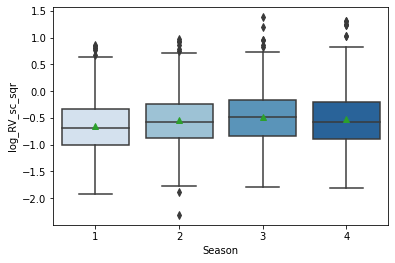

In [53]:
ax = sns.boxplot(x='Season', y='log_RV_sc_sqr', data=data, palette='Blues', showmeans=True)

In [54]:
stats.describe(data.loc[data['Summer'] == 1, 'log_RV_sc_sqr'])

DescribeResult(nobs=601, minmax=(-1.9245828937028984, 0.8658870399700312), mean=-0.64459850567737, variance=0.27252533543122043, skewness=0.35738469749458046, kurtosis=-0.03358740321092668)

In [55]:
data.loc[data['Summer'] == 1, 'log_RV_sc_sqr'].describe()

count    601.000000
mean      -0.644599
std        0.522040
min       -1.924583
25%       -1.002371
50%       -0.690061
75%       -0.342269
max        0.865887
Name: log_RV_sc_sqr, dtype: float64

In [56]:
stats.describe(data.loc[data['Autumn'] == 1, 'log_RV_sc_sqr'])

DescribeResult(nobs=637, minmax=(-2.31270003443958, 0.9821381917828768), mean=-0.54249507920854, variance=0.2151205525703356, skewness=0.22544798034171848, kurtosis=0.42926970475068815)

In [57]:
data.loc[data['Autumn'] == 1, 'log_RV_sc_sqr'].describe()

count    637.000000
mean      -0.542495
std        0.463811
min       -2.312700
25%       -0.878849
50%       -0.568163
75%       -0.236676
max        0.982138
Name: log_RV_sc_sqr, dtype: float64

In [58]:
stats.describe(data.loc[data['Winter'] == 1, 'log_RV_sc_sqr'])

DescribeResult(nobs=633, minmax=(-1.7872122521241758, 1.3793589013675163), mean=-0.4886247467655761, variance=0.24237041267585252, skewness=0.2764896573330848, kurtosis=0.1024877872327683)

In [59]:
data.loc[data['Winter'] == 1, 'log_RV_sc_sqr'].describe()

count    633.000000
mean      -0.488625
std        0.492311
min       -1.787212
25%       -0.830366
50%       -0.490315
75%       -0.171907
max        1.379359
Name: log_RV_sc_sqr, dtype: float64

In [60]:
stats.describe(data.loc[data['Spring'] == 1, 'log_RV_sc_sqr'])

DescribeResult(nobs=629, minmax=(-1.805086522501624, 1.3173359944217193), mean=-0.5187092607110755, variance=0.28293308324573446, skewness=0.6683613232250087, kurtosis=0.4571072842263715)

In [61]:
data.loc[data['Spring'] == 1, 'log_RV_sc_sqr'].describe()

count    629.000000
mean      -0.518709
std        0.531915
min       -1.805087
25%       -0.899797
50%       -0.580441
75%       -0.199888
max        1.317336
Name: log_RV_sc_sqr, dtype: float64

From the side-by-side boxplots, it can be seen that the five numerical summary of log of RV distribution in Summer, Autumn, Winter, and Spring groups are much more distinguishable. Specifically, the log of the square root of 5 min RV in Winter tend to be highest, which is followed by Spring and Autumn. Consequently, the log of RV in Summer tend to be inferior to that of the remaining three seasons.

To examine such claim quantitatively, the mean log of the square root of 5 min RV values for Summer, Autumn, Winter, and Spring groups are -0.64, -0.54, -0.48, and -0.51 respectively, which reflects the highest volatility level in the Summer on average and highlights the inferiority of the mean of log of the square root of 5 min RV values of Summer as compared to that of Winter, Spring and Autumn. Furthermore, the similar pattern can be also oberseved as considering the median of log of the square root of 5 min RV values of 4 mentioned seasons (i.e -0.69, -0.57, -0.49, and -0.58 for Summer, Autumn, Winter, and Spring groups respectively).

By this transformation of the square root of 5 min RV variable, the affect of the season of the year on the square root of 5 min RV variable can be seen clearly as illustrated above. The boxplots illustrate stronger marginal effects of each category predictor on the log of the square root of 5 min RV.

<span style="color:red">Data cleaning and manipulation </span>

Cleaning data: there is no reason to delete outlying square root of 5 min RV from the data in the subsequent analysis, regression and subsequent ANOVA tests below. There is no need for data cleaning at this stage, unless we are aware of
errors in the data (which we are not). Data should not be deleted or removed unless it is known to be in error.

Data manipulation: since in the orginial data, the square root of 5 min RV variable distribution contains of a small number of extreme outlying value, making any visulizations very unclear and not allowing assessment of any potential relationship or the distribution of non-outlying value. These outliers cast immediate doubt on the finite 4th moment assumption in one-way ANOVA test. Thus, log transformation for the square root of 5 min RV variable to come up with a new variable, which is the log of the square root of 5 min RV variable is necessary to ease the influence of outliers on the results of one-way and two-way ANOVA test.

# Part 2: one-way ANOVA tests

<span style="color:red">ANOVA test for the square root of 5 min RV and day of the week</span>

In [62]:
reg1= smf.ols(formula='RV_sc_sqr ~ C(day_of_week)',data=data).fit()
reg1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              RV_sc_sqr   R-squared:                       0.018
Model:                            OLS   Adj. R-squared:                  0.016
Method:                 Least Squares   F-statistic:                     11.28
Date:                Fri, 07 May 2021   Prob (F-statistic):           4.51e-09
Time:                        14:50:08   Log-Likelihood:                -1239.7
No. Observations:                2500   AIC:                             2489.
Df Residuals:                    2495   BIC:                             2519.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               0.6769      0.018     37.831      0.000       0.642       0.712
C(day_of_week)[T.1]     0.0057      0.025      0.230      0.818      -0.043       0.055
C(day_of_week)[T.2]     0.0228      0.025      0.906      0.365      -0.027       0.072
C(day_of_week)[T.3]     0.0189      0.025      0.749      0.454      -0.031       0.068
C(day_of_week)[T.4]    -0.1229      0.026     -4.803      0.000      -0.173      -0.073
==============================================================================
Omnibus:                     1432.639   Durbin-Watson:                   0.794
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            14917.870
Skew:                           2.546   Prob(JB):                         0.00
Kurtosis:                      13.829   Cond. No.                         5.86
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

$\widehat{\sqrt{\text{5 min RV}}} = 0.6769 + 0.0057\times D_{\text{Tues}}+0.0228\times D_{\text{Wed}}+0.0189\times D_{\text{Thurs}}-0.1229\times D_{\text{Fri}}$

This is actually five predictions for the square root of 5 min RV, one for each category of day. These are:

$\widehat{\sqrt{\text{5 min RV}}} = 0.6769\%$, when $D_{\text{Tues}} = D_{\text{Wed}} = D_{\text{Thurs}} = D_{\text{Fri}}=0$

$\widehat{\sqrt{\text{5 min RV}}} = 0.6769\%+0.0057\%=0.6826\%$, when $D_{\text{Wed}} = D_{\text{Thurs}} = D_{\text{Fri}}=0$, $D_{\text{Tues}} = 1$

$\widehat{\sqrt{\text{5 min RV}}} = 0.6769\%+0.0228\%=0.6997\%$, when $D_{\text{Tues}} = D_{\text{Thurs}} = D_{\text{Fri}}=0$, $D_{\text{Wed}} = 1$

$\widehat{\sqrt{\text{5 min RV}}} = 0.6769\%+0.0189\%=0.6958\%$, when $D_{\text{Tues}} = D_{\text{Wed}} = D_{\text{Fri}}=0$, $D_{\text{Thurs}} = 1$

$\widehat{\sqrt{\text{5 min RV}}} = 0.6769\%-0.1229\%=0.5540\%$, when $D_{\text{Tues}} = D_{\text{Wed}} = D_{\text{Thurs}}=0$, $D_{\text{Fri}} = 1$

The simple interpretation is that we predict the square root of 5 min RV to be, on average: 0.6769% on Monday ; 0.6826% on Tuesday; 0.6997% on Wednesday, 0.6958% on Thursday, 0.5540% on Friday.

In [63]:
reg1.mse_resid, reg1.mse_resid**0.5

(0.15816702379574507, 0.39770217977243355)

It can be seen that as $R^{2} = 0.018$ and $R^{2}_{\text{adjusted}}=0.016$, the linear relationship estimated above is statistically weak. Besides, the SER of 0.3977% of the model needs to be examined cautiuosly by financial consultant regarding whether this is significant in this case. 

Other than that, considering 4 tests regarding $H_0$: $\beta_{i} =0$ vs $H_1$: $\beta_{i} \neq 0$ for i=1,2,3,4 at $\alpha = 0.05$, the p-values for each i are 0.818, 0.365, 0.454, and 0.000 and such results imply that we can only reject the null hypotheses in case i=4 and that the $D_{\text{Fri}}$ and  square root of 5 min RV are significantly linearly related while the linear relationships between  square root of 5 min RV and $D_{\text{Tues}}$, $D_{\text{Wed}}$, $D_{\text{Thurs}}$ are insignificant.

In [64]:
table1= sm.stats.anova_lm(reg1, typ=3)
table1

,sum_sq,df,F,PR(>F)
Intercept,226.360490,1.0,1431.148447,6.226332e-248
C(day_of_week),7.137095,4.0,11.280947,4.506149e-09
Residual,394.626724,2495.0,NaN,NaN


The hypotheses here are:

$H_{0}$: $\mu_{1}=...=\mu_{5}$, means are the same across 5 days in the week

$H_{1}$: $\exists i,j \in \{1,2,3,4,5\}$, $i \neq j$ and $\mu_{i}\neq\mu_{j}$, at least two means are different across 5 days in the week

For $\mu_{1}$, $\mu_{2}$, $\mu_{3}$, $\mu_{4}$ and $\mu_{5}$ are the mean of the square root of 5 min RV on Monday, Tuesday, Wednesday, Thursday, and Friday respectively.

We choose $\alpha=0.05$ as standard. 

The test statistics is $F_{\text{stat}} =11.280947$, which has a F distribution with $m-1 = 5-1=4$ degrees of freedom in numerator and $n-m=2500-5=2495$ degrees of freedom in denominator, , if the null of equality of means is, and the LSA 1-6 assumptions are also, true. 

The chance that the resulting F value would be more extreme than 11.280947, in the direction of the alternative hypothesis which is more or greater than, is very close to 0. Specifically, the p-value is $P(F_{4,2495} > 11.280947) = 4.506149\times10^{-09}$. 

Hence, such p-value is $< 0.05$, it is statistically sufficient for us to reject the null and conclude that the mean RV of difference days of the week is difference from each other. In other words, the square root of 5 min RV may be affected by day of the week.

<span style="color:red">Assumptions assessment</span>

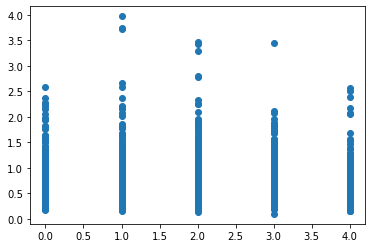

In [65]:
plt.scatter(data['day_of_week'],data['RV_sc_sqr'])

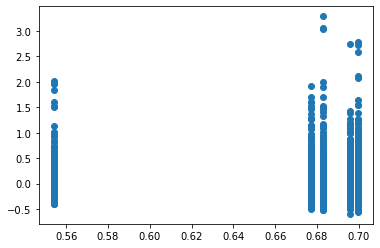

In [66]:
fit1 = reg1.fittedvalues
res1 = reg1.resid
plt.scatter(fit1,res1)

The residuals in the above graphs seem to have changing variance across 5 groups. However, the root of this phenomenon may be the existence of small number of outliers in each group. Thus, this may not harm the assumption of constant variance

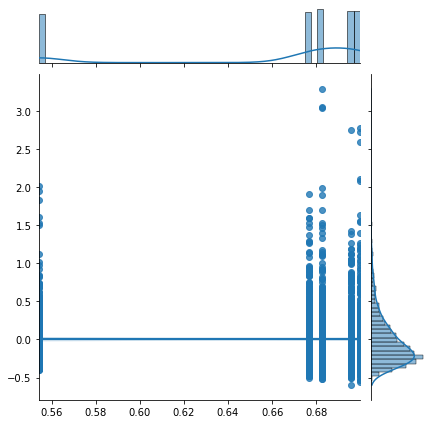

In [67]:
sns.jointplot(x=fit1, y=res1, kind="reg")

From the above plot, equally spread residuals around a horizontal line without distinct patterns, that is a good indication of constant variance across groups. On the other hand, the regression line of estimated residuals to the fitted values is a perfect horizontal line through the origin $O(0,0)$ associated with the result of testing hypotheses $H_{\text{0}}: \rho = 0$ versus $H_{\text{1}}: \rho \neq 0$, the p-value of nearly one claim that this correlation coefficient is significantly around zero. Thus, the true linearity relationship may be assured.

In [69]:
data['res_1']=res1

In [70]:
stats.describe(data.loc[data['Mon']==1, 'res_1'])

DescribeResult(nobs=494, minmax=(-0.49909947639336716, 1.9117861111073546), mean=-9.49308108505397e-16, variance=0.14681615406221565, skewness=1.8027494616331186, kurtosis=4.096893795806295)

In [71]:
stats.describe(data.loc[data['Tues']==1, 'res_1'])

DescribeResult(nobs=523, minmax=(-0.5185218859287654, 3.289685928427978), mean=-8.423259965033693e-16, variance=0.19440123414356433, skewness=3.183767048426224, kurtosis=15.760475066381744)

In [72]:
stats.describe(data.loc[data['Wed']==1, 'res_1'])

DescribeResult(nobs=508, minmax=(-0.5537588780506087, 2.7768793108322756), mean=-2.7974123455122054e-16, variance=0.18185394929647816, skewness=2.8216414525715687, kurtosis=11.792398112367547)

In [73]:
stats.describe(data.loc[data['Thurs']==1, 'res_1'])

DescribeResult(nobs=502, minmax=(-0.5968027301523491, 2.7471167442649884), mean=-8.634085036128708e-16, variance=0.14931069382727094, skewness=1.8590918021931957, kurtosis=5.879884796630721)

In [74]:
stats.describe(data.loc[data['Fri']==1, 'res_1'])

DescribeResult(nobs=473, minmax=(-0.4024642725765926, 2.01159675386335), mean=-4.882164674884409e-16, variance=0.11390742858897021, skewness=2.34150709545833, kurtosis=8.50359116632589)

The sample mean of residuals given the observation is in Monday group is $-9.49308108505397\times10^{-16}$%, which suggests $E(\varepsilon_{i,Monday}|Monday)=0$% may hold.

The sample mean of residuals given the observation is in Tuesday group is $-8.423259965033693\times10^{-16}$%, which suggests $E(\varepsilon_{i,Tuesday}|Tuesday)=0$% may hold.

The sample mean of residuals given the observation is in Wednesday group is $-2.7974123455122054\times10^{-16}$%, which suggests $E(\varepsilon_{i,Wednesday}|Wednesday)=0$% may hold.

The sample mean of residuals given the observation is in Thursday group is $-8.634085036128708\times10^{-16}$%, which suggests $E(\varepsilon_{i,Thursday}|Thursday)=0$% may hold.

The sample mean of residuals given the observation is in Friday group is $-4.882164674884409\times10^{-16}$%, which suggests $E(\varepsilon_{i,Friday}|Friday)=0$% may hold.

<AxesSubplot:xlabel='RV_sc_sqr', ylabel='Count'>

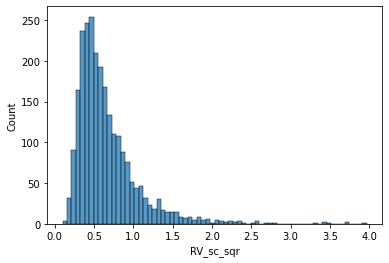

In [75]:
sns.histplot(data['RV_sc_sqr'], kde=False)

Assumptions of one-way ANOVA test:

$1/$ Linearity ($E(Y|X=j)=\mu_{j}$  for $j=1,...,5$): the residual plot suggests that linearity could hold and the discussion of relationship of residuals and fitted values above further consolidates this claim. Thus, this assumption may be met.

$2/$ Exogeneity ($E(\varepsilon|X=j)=0$ for $j=1,...,5$): the residuals against predicted values plot suggests that $E(\varepsilon|X=j)\approx0$ for $j=1,...,5$. Furthermore, the sample mean of residuals in each group is also approximately zero as discuss above, which suggests this assumption may be met.

$3/$ The data are independent and identically distributed in each group: this assumes the distribution of the square root of 5 min RV is the same within each group and is only affected by day of the week, meaning no other factor determiningthe square root of 5 min RV changes between different days of the week. . Thus, the square root of 5 min RV may be independent among groups. Hence, this assumption may be met.

However, it should be noted that from the time series plot, the RV displays a strong pattern over time: there are periods of persistent high volatility and at other times periods of  persistent low volatility. High values of the RV tend to follow high values of the RV; and vice versa. Thus, this may be detrimental to the validity of the assumption and in such case, data thinning may have helped remove any autocorrelation here.

$4/$ The data in each group have finite forth moments ($E(Y_{j}^4)<\infty$ for $j=1,...,5$): according to the exploratory analysis of the root mean square of 5 min RV, there are several outliers associated with high Fisher's kurtosis of 10.71 and distribution with flat tail and highly positive skewness. On the other hand, the kurtosis for the root mean square of 5 min RV of Monday, Tuesday, Wednesday, Thursday and Friday are 4.10, 15.76, 11.79, 5.88 and 8.50 respectively suggesting excessive outliers in each group distribution. Hence, this may cast doubt on the finite value of the forth moments of the square root of 5 min RV across groups. However, it should be noted the fact that the financial nature of return volatility allows the square root of 5 min RV values have a lower bound of 0 and should have a certain upper bound. Thus, the square root of 5 min RV is a bounded random variable. Hence, this assumption may be met but the excessive kurtosis should be monitored cautiously.

$5/$ $n_{j} \geq 30$ for $j=1,...,m$: 494, 523, 508, 502, and 473 are respectively the number of observations originating from Monday, Tuesday, Wednesday, Thursday and Friday groups. Thus, it is sufficient to conclude that this assumption is met.

$6/$ Equality of variances across the groups ($Var(Y|X=j)= \sigma^2$ for $j=1,...,5$): according to the residuals against predicted values plot, the variance of the residuals seems to remain constant due to  equally spread residuals around a horizontal line without distinct patterns. Furthermore, the sample variance of residuals for Monday, Tuesday, Wednesday, Thursday and Friday groups are 0.15, 0.19, 0.18, 0.15, and 0.11 respectively, which are quite varied but this may or may not be due to the influence of outliers, suggesting this assumption may be reasonbly satisfied. However, to be cautious, a Het-robust version of this ANOVA test should be conducted, which is illustrated as below.

In [76]:
reg1_new= smf.ols(formula='RV_sc_sqr ~ C(day_of_week)',data=data).fit(cov_type='HC0')
reg1_new.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              RV_sc_sqr   R-squared:                       0.018
Model:                            OLS   Adj. R-squared:                  0.016
Method:                 Least Squares   F-statistic:                     14.32
Date:                Fri, 07 May 2021   Prob (F-statistic):           1.45e-11
Time:                        14:50:13   Log-Likelihood:                -1239.7
No. Observations:                2500   AIC:                             2489.
Df Residuals:                    2495   BIC:                             2519.
Df Model:                           4                                         
Covariance Type:                  HC0                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               0.6769      0.017     39.306      0.000       0.643       0.711
C(day_of_week)[T.1]     0.0057      0.026      0.223      0.824      -0.045       0.056
C(day_of_week)[T.2]     0.0228      0.026      0.891      0.373      -0.027       0.073
C(day_of_week)[T.3]     0.0189      0.024      0.775      0.438      -0.029       0.067
C(day_of_week)[T.4]    -0.1229      0.023     -5.303      0.000      -0.168      -0.077
==============================================================================
Omnibus:                     1432.639   Durbin-Watson:                   0.794
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            14917.870
Skew:                           2.546   Prob(JB):                         0.00
Kurtosis:                      13.829   Cond. No.                         5.86
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC0)
"""

In [77]:
table1_new= sm.stats.anova_lm(reg1_new, typ=2)
table1_new

,sum_sq,df,F,PR(>F)
C(day_of_week),9.061361,4.0,14.322456,1.454712e-11
Residual,394.626724,2495.0,NaN,NaN


The hypotheses here are:

$H_{0}$: $\mu_{1}=...=\mu_{5}$, means are the same across 5 days in the week

$H_{1}$: $\exists i,j \in \{1,2,3,4,5\}$, $i \neq j$ and $\mu_{i}\neq\mu_{j}$, at least two means are different across 5 days in the week

For $\mu_{1}$, $\mu_{2}$, $\mu_{3}$, $\mu_{4}$ and $\mu_{5}$ are the mean of the square root of 5 min RV on Monday, Tuesday, Wednesday, Thursday, and Friday respectively.

We choose $\alpha=0.05$ as standard. 

The test statistics is $F_{\text{stat}} =14.322456$, which has a F distribution with $m-1 = 5-1=4$ degrees of freedom in numerator and $n-m=2500-5=2495$ degrees of freedom in denominator, , if the null of equality of means is, and the LSA 1-5 assumptions are also, true. 

The chance that the resulting F value would be more extreme than 14.322456, in the direction of the alternative hypothesis which is more or greater than, is very close to 0. Specifically, the p-value is $P(F_{4,2495} > 14.322456) = 1.454712\times10^{-11}$. 

Hence, such p-value is $< 0.05$, it is statistically sufficient for us to reject the null and conclude that the mean RV of difference days of the week is difference from each other. In other words, the root square of 5 min RV may be affected by day of the week.

<span style="color:red">Differences assessment - the square root of 5 min RV and day of the week</span>

In [78]:
dif1=MultiComparison(data['RV_sc_sqr'],data['day_of_week'])
result1 = dif1.tukeyhsd()
print(result1)

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     0      1   0.0057    0.9 -0.0624  0.0739  False
     0      2   0.0228 0.8909 -0.0458  0.0914  False
     0      3   0.0189    0.9 -0.0499  0.0877  False
     0      4  -0.1229  0.001 -0.1927  -0.053   True
     1      2    0.017    0.9 -0.0506  0.0847  False
     1      3   0.0131    0.9 -0.0547   0.081  False
     1      4  -0.1286  0.001 -0.1975 -0.0597   True
     2      3  -0.0039    0.9 -0.0722  0.0644  False
     2      4  -0.1457  0.001  -0.215 -0.0763   True
     3      4  -0.1418  0.001 -0.2113 -0.0722   True
----------------------------------------------------


Turkey's interval for the mean difference from Tuesday to Monday is $(-0.0624, 0.0739)$

Turkey's interval for the mean difference from Wednesday to Monday is $(-0.0458, 0.0914)$

Turkey's interval for the mean difference from Thursday to Monday is $(-0.0499, 0.0877)$

Turkey's interval for the mean difference from Friday to Monday is $(-0.1927,-0.0530)$

Turkey's interval for the mean difference from Wednesday to Tuesday is $(-0.0506, 0.0847)$

Turkey's interval for the mean difference from Thursday to Tuesday is $(-0.0547,0.0810)$

Turkey's interval for the mean difference from Friday to Tuesday is $(-0.1975,-0.0597)$

Turkey's interval for the mean difference from Thursday to Wednesday is $(-0.0722,0.0644)$

Turkey's interval for the mean difference from Friday to Wednesday is $(-0.2150, -0.0763)$

Turkey's interval for the mean difference from Friday to Thursday is $(-0.2113,0.0722)$

In this case, while the differences between Monday and Friday, Tuesday and Friday, Wednesday and Friday, Thursday and Friday are significant and the differences of the other pairs are not statistically significant in terms of the square root of 5 min RV at $\alpha = 0.05$. 

<span style="color:red">ANOVA test for the square root of 5 min RV and season of the year</span>

In [79]:
reg2= smf.ols(formula='RV_sc_sqr ~ C(Season)',data=data).fit()
reg2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              RV_sc_sqr   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     7.361
Date:                Fri, 07 May 2021   Prob (F-statistic):           6.55e-05
Time:                        14:50:13   Log-Likelihood:                -1251.1
No. Observations:                2500   AIC:                             2510.
Df Residuals:                    2496   BIC:                             2534.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.6062      0.016     37.202      0.000       0.574       0.638
C(Season)[T.2]     0.0439      0.023      1.933      0.053      -0.001       0.088
C(Season)[T.3]     0.0903      0.023      3.969      0.000       0.046       0.135
C(Season)[T.4]     0.0918      0.023      4.027      0.000       0.047       0.136
==============================================================================
Omnibus:                     1411.075   Durbin-Watson:                   0.826
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            14138.766
Skew:                           2.510   Prob(JB):                         0.00
Kurtosis:                      13.513   Cond. No.                         4.87
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

$\widehat{\sqrt{\text{5 min RV}}} = 0.6062 + 0.0439\times D_{\text{Autumn}}+0.0903\times D_{\text{Winter}}+0.0918\times D_{\text{Spring}}$

This is actually five predictions for the square root of 5 min RV, one for each category of day. These are:

$\widehat{\sqrt{\text{5 min RV}}} = 0.6062\%$, when $D_{\text{Autumn}} = D_{\text{Winter}} = D_{\text{Spring}}=0$

$\widehat{\sqrt{\text{5 min RV}}} =  0.6062\%+0.0439\%=0.6501\%$, when $D_{\text{Winter}} = D_{\text{Spring}}=0$, $D_{\text{Autumn}} = 1$

$\widehat{\sqrt{\text{5 min RV}}} = 0.6062\%+0.0903\%=0.6965\%$, when $D_{\text{Autumn}} = D_{\text{Spring}}=0$, $D_{\text{Winter}} = 1$

$\widehat{\sqrt{\text{5 min RV}}} = 0.6062\%+0.0918\%=0.6980\%$, when $D_{\text{Autumn}} = D_{\text{Winter}} =0$, $D_{\text{Spring}}=1$

The simple interpretation is that we predict the square root of 5 min RV to be, on average: 0.6062% in Summer; 0.6501% in Autumn; 0.6965% in Winter, 0.6980% in Spring.

In [80]:
reg2.mse_resid, reg2.mse_resid**0.5

(0.15955146165789025, 0.39943893357795035)

It can be seen that as $R^{2} = 0.009$ and $R^{2}_{\text{adjusted}}=0.008$, the linear relationship estimated above is statistically weak. Besides, the SER of 0.3994% of the model needs to be examined cautiuosly by financial consultant regarding whether this is significant in this case. 

Other than that, considering 3 tests regarding $H_0$: $\beta_{i} =0$ vs $H_1$: $\beta_{i} \neq 0$ for i=1,2,3 at $\alpha = 0.05$, the p-values for each i are 0.530, 0.000, and 0.000 and such results imply that we can reject the null hypotheses in case i=2,3 and that the $D_{\text{Autumn}}$ and the square root of 5 min RV are not significantly linearly related while the linear relationships between the square root of 5 min RV and $D_{\text{Winter}}$, $D_{\text{Spring}}$ are significant.

In [81]:
table2= sm.stats.anova_lm(reg2, typ=3)
table2

,sum_sq,df,F,PR(>F)
Intercept,220.820178,1.0,1384.005988,2.114538e-241
C(Season),3.523371,3.0,7.360992,6.553620e-05
Residual,398.240448,2496.0,NaN,NaN


The hypotheses here are:

$H_{0}$: $\mu_{1}=...=\mu_{4}$, means are the same across 4 seasons

$H_{1}$: $\exists i,j \in \{1,2,3,4\}$, $i \neq j$ and $\mu_{i}\neq\mu_{j}$, at least two means are different across 4 seasons

For $\mu_{1}$, $\mu_{2}$, $\mu_{3}$, and $\mu_{4}$ are the mean of the square root of 5 min RV in Summer, Autumn, Winter, and Spring respectively.

We choose $\alpha=0.05$ as standard. 

The test statistics is $F_{\text{stat}} =7.360992$, which has a F distribution with $m-1 = 4-1=3$ degrees of freedom in numerator and $n-m=2500-4=2496$ degrees of freedom in denominator, , if the null of equality of means is, and the LSA 1-6 assumptions are also, true. 

The chance that the resulting F value would be more extreme than 7.360992, in the direction of the alternative hypothesis which is more or greater than, is very close to 0. Specifically, the p-value is $P(F_{3,2496} > 7.360992) = 0.000066$. 

Hence, such p-value is $< 0.05$, it is statistically sufficient for us to reject the null and conclude that the mean RV of difference seasons of a year is difference from each other. In other words, the root square of 5 min RV may be affected by season of the year.

<span style="color:red">Assumptions assessment</span>

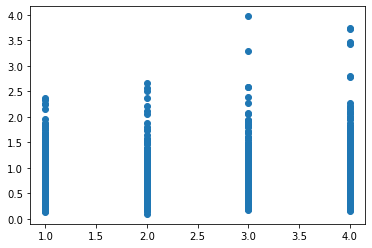

In [82]:
plt.scatter(data['Season'],data['RV_sc_sqr'])

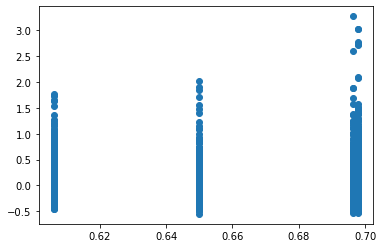

In [83]:
fit2 = reg2.fittedvalues
res2 = reg2.resid
plt.scatter(fit2,res2)

The residuals in the above graphs seem to have changing variance across 4 groups. However, the root of this phenomenon may be the existence of small number of outliers in each group. Thus, this may not harm the assumption of constant variance

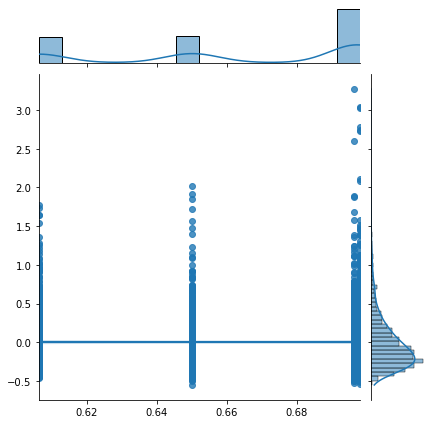

In [84]:
sns.jointplot(x=fit2, y=res2, kind="reg")

In [85]:
p, p_value = stats.pearsonr(fit2,res2)
p, p_value

(3.9898639947466563e-17, 1.0000000000025966)

From the above plot, equally spread residuals around a horizontal line without distinct patterns, that is a good indication of constant variance across groups. On the other hand, the regression line of estimated residuals to the fitted values is a perfect horizontal line through the origin $O(0,0)$ associated with the result of testing hypotheses $H_{\text{0}}: \rho = 0$ versus $H_{\text{1}}: \rho \neq 0$, the p-value of nearly one claim that this correlation coefficient is significantly around zero. Thus, the true linearity relationship may be assured.

In [86]:
data['res_2']=res2

In [87]:
stats.describe(data.loc[data['Summer']==1, 'res_2'])

DescribeResult(nobs=601, minmax=(-0.4602162217558614, 1.77096090895537), mean=1.77340117078228e-16, variance=0.13284075184157654, skewness=1.866855409571993, kurtosis=4.2002642640547885)

In [88]:
stats.describe(data.loc[data['Autumn']==1, 'res_2'])

DescribeResult(nobs=637, minmax=(-0.55107573683158, 2.02009011439649), mean=-5.0195326702047896e-17, variance=0.11705986299010045, skewness=2.0811283733320574, kurtosis=6.854220201843342)

In [89]:
stats.describe(data.loc[data['Winter']==1, 'res_2'])

DescribeResult(nobs=633, minmax=(-0.5290219292411711, 3.2759059490411673), mean=1.0102503352039339e-16, variance=0.15819219312872743, skewness=2.5290789002959877, kurtosis=11.996324798696627)

In [90]:
stats.describe(data.loc[data['Spring']==1, 'res_2'])

DescribeResult(nobs=629, minmax=(-0.5334527241147576, 3.0355492028677897), mean=2.0333496412848655e-16, variance=0.22947206731542763, skewness=2.774403395254762, kurtosis=10.889638070016339)

The sample mean of residuals given the observation is in Summer group is $1.77340117078228\times10^{-16}$%, which suggests $E(\varepsilon_{i,Summer}|Summer)=0$% may hold.

The sample mean of residuals given the observation is in Autumn group is $-5.0195326702047896\times10^{-17}$%, which suggests $E(\varepsilon_{i,Autumn}|Autumn)=0$% may hold.

The sample mean of residuals given the observation is in Winter group is $1.0102503352039339\times10^{-16}$%, which suggests $E(\varepsilon_{i,Winter}|Winter)=0$% may hold.

The sample mean of residuals given the observation is in Spring group is $2.0333496412848655\times10^{-16}$%, which suggests $E(\varepsilon_{i,Spring}|Spring)=0$% may hold.

<AxesSubplot:xlabel='RV_sc_sqr', ylabel='Count'>

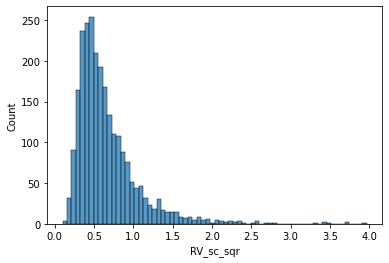

In [91]:
sns.histplot(data['RV_sc_sqr'], kde=False)

Assumptions of one-way ANOVA test: 

$1/$ Linearity ($E(Y|X=j)=\mu_{j}$  for $j=1,...,4$): the residual plot suggests that linearity could hold and the discussion of relationship of residuals and fitted values above further consolidates this claim. Thus, this assumption may be met.

$2/$ Exogeneity ($E(\varepsilon|X=j)=0$ for $j=1,...,4$): the residuals against predicted values plot suggests that $E(\varepsilon|X=j)\approx0$ for $j=1,...,4$. Furthermore, the sample mean of residuals in each group is also approximately zero as discussed above, which suggests this assumption may be met.

$3/$ The data are independent and identically distributed in each group: this assumes the distribution of the square root of 5 min RV is the same within each group and is only affected by season of the year, meaning no other factor determining the square root of 5 min RV changes between different season of the year. First, the square root of 5 min RV do not display any clear trends over time, they seem close to uncorrelated over time. Further, financial theory does say (strongly) that market efficiency implies that returns should be independent and identically distributed ("strong efficiency") and certainly uncorrelated ("weak efficiency") over time. Thus, the square root of 5 min RV may be independent among groups. Hence, this assumption may be met.

However, it should be noted that from the time series plot, the RV displays a strong pattern over time: there are periods of persistent high volatility and at other times periods of  persistent low volatility. High values of the RV tend to follow high values of the RV; and vice versa. Thus, this may be detrimental to the validity of the assumption and in such case, data thinning may have helped remove any autocorrelation here.

$4/$ The data in each group have finite forth moments ($E(Y_{j}^4)<\infty$ for $j=1,...,4$): According to the exploratory analysis of the root mean square of 5 min RV, there are several outliers associated with high kurtosis of 10.71 and distribution with flat tail and highly positive skewness. On the other hand, the Fisher's kurtosis for the root mean square of 5 min RV of Summer, Autumn, Winter, and Spring are 4.20, 6.85, 11.99, and 10.89 respectively suggesting excessive outliers in each group distribution. Hence, this may cast doubt on the finite value of the forth moments of the square root of 5 min RV across groups. However, it should be noted the fact that the financial nature of return volatility allows the square root of 5 min RV values have a lower bound of 0 and should have a certain upper bound. Thus, the square root of 5 min RV is a bouned random variable. Hence, this assumption may be met.

$5/$ $n_{j} \geq 30$ for $j=1,...,4$: 601,633,627,639 are respectively the number of observations originating from Summer, Autumn, Winter, and Spring groups. Thus, it is sufficient to conclude that this assumption is met.

$6/$ Equality of variances across the groups ($Var(Y|X=j)= \sigma^2$ for $j=1,...,4$): according to the residuals against predicted values plot, the variance of the residuals seems to remain constant due to  equally spread residuals around a horizontal line without distinct patterns. Furthermore, the sample variance of residuals for Summer, Autumn, Winter, and Spring groups are 0.13, 0.12, 0.16, and 0.23 respectively, which are quite varied but this may or may not be due to the influence of outliers, suggesting this assumption may be satisfied in general. However, to be cautious, a Het-robust version of this ANOVA test should be conducted, which is illustrated as below.

In [92]:
reg2_new= smf.ols(formula='RV_sc_sqr ~ C(Season)',data=data).fit(cov_type='HC0')
reg2_new.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              RV_sc_sqr   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     7.603
Date:                Fri, 07 May 2021   Prob (F-statistic):           4.64e-05
Time:                        14:50:17   Log-Likelihood:                -1251.1
No. Observations:                2500   AIC:                             2510.
Df Residuals:                    2496   BIC:                             2534.
Df Model:                           3                                         
Covariance Type:                  HC0                                         
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.6062      0.015     40.805      0.000       0.577       0.635
C(Season)[T.2]     0.0439      0.020      2.185      0.029       0.005       0.083
C(Season)[T.3]     0.0903      0.022      4.164      0.000       0.048       0.133
C(Season)[T.4]     0.0918      0.024      3.794      0.000       0.044       0.139
==============================================================================
Omnibus:                     1411.075   Durbin-Watson:                   0.826
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            14138.766
Skew:                           2.510   Prob(JB):                         0.00
Kurtosis:                      13.513   Cond. No.                         4.87
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC0)
"""

$\widehat{\sqrt{\text{5 min RV}}} = 0.6062 + 0.0439\times D_{\text{Autumn}}+0.0903\times D_{\text{Winter}}+0.0918\times D_{\text{Spring}}$

This is actually five predictions for the square root of 5 min RV, one for each category of day. These are:

$\widehat{\sqrt{\text{5 min RV}}} = 0.6062\%$, when $D_{\text{Autumn}} = D_{\text{Winter}} = D_{\text{Spring}}=0$

$\widehat{\sqrt{\text{5 min RV}}} =  0.6062\%+0.0439\%=0.6501\%$, when $D_{\text{Winter}} = D_{\text{Spring}}=0$, $D_{\text{Autumn}} = 1$

$\widehat{\sqrt{\text{5 min RV}}} = 0.6062\%+0.0903\%=0.6965\%$, when $D_{\text{Autumn}} = D_{\text{Spring}}=0$, $D_{\text{Winter}} = 1$

$\widehat{\sqrt{\text{5 min RV}}} = 0.6062\%+0.0918\%=0.6980\%$, when $D_{\text{Autumn}} = D_{\text{Winter}} =0$, $D_{\text{Spring}}=1$

The simple interpretation is that we predict the square root of 5 min RV to be, on average: 0.6062% in Summer; 0.6501% in Autumn; 0.6965% in Winter, 0.6980% in Spring.

In [93]:
table2_new= sm.stats.anova_lm(reg2_new, typ=2)
table2_new

,sum_sq,df,F,PR(>F)
C(Season),3.639421,3.0,7.603442,0.000046
Residual,398.240448,2496.0,NaN,NaN


The hypotheses here are:

$H_{0}$: $\mu_{1}=...=\mu_{4}$, means are the same across 4 seasons

$H_{1}$: $\exists i,j \in \{1,2,3,4\}$, $i \neq j$ and $\mu_{i}\neq\mu_{j}$, at least two means are different across 4 seasons

For $\mu_{1}$, $\mu_{2}$, $\mu_{3}$, and $\mu_{4}$ are the mean of the square root of 5 min RV in Summer, Autumn, Winter, and Spring respectively.

We choose $\alpha=0.05$ as standard. 

The test statistics is $F_{\text{stat}} =7.603442$, which has a F distribution with $m-1 = 4-1=3$ degrees of freedom in numerator and $n-m=2500-4=2496$ degrees of freedom in denominator, , if the null of equality of means is, and the LSA 1-5 assumptions are also, true. 

The chance that the resulting F value would be more extreme than 7.360992, in the direction of the alternative hypothesis which is more or greater than, is very close to 0. Specifically, the p-value is $P(F_{3,2496} > 7.603442) = 0.000046$. 

Hence, such p-value is $< 0.05$, it is statistically sufficient for us to reject the null and conclude that the mean RV of difference seasons of a year is difference from each other. In other words, the root square of 5 min RV may be affected by season of the year.

<span style="color:red">Differences assessment - the square root of 5 min RV and season of the year</span>

In [94]:
dif2=MultiComparison(data['RV_sc_sqr'],data['Season'])
result2 = dif2.tukeyhsd()
print(result2)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     1      2   0.0439 0.2144 -0.0145 0.1023  False
     1      3   0.0903  0.001  0.0318 0.1488   True
     1      4   0.0918  0.001  0.0332 0.1503   True
     2      3   0.0464 0.1638 -0.0113  0.104  False
     2      4   0.0478 0.1436 -0.0099 0.1056  False
     3      4   0.0015    0.9 -0.0563 0.0593  False
---------------------------------------------------


Turkey's interval for the mean difference from Autumn to Summer is $(-0.0145, 0.1023)$

Turkey's interval for the mean difference from Winter to Summer is $(0.0318, 0.1488)$

Turkey's interval for the mean difference from Spring to Monday is $(0.0332, 0.1503)$

Turkey's interval for the mean difference from Winter to Autumn is $(-0.0113, 0.1040)$

Turkey's interval for the mean difference from Spring to Autumn is $(-0.0099, 0.1056)$

Turkey's interval for the mean difference from Spring to Winter is $(-0.0563, 0.0593)$

In this case, while the differences between Summer and Winter, Summer and Springe significant and the differences of the other pairs are not statistically significant in terms of the square root of 5 min RV at $\alpha = 0.05$.

<span style="color:red">ANOVA test for log of the square root of 5 min RV and day of the week</span>

In [95]:
reg1_log= smf.ols(formula='log_RV_sc_sqr ~ C(day_of_week)',data=data).fit()
reg1_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          log_RV_sc_sqr   R-squared:                       0.032
Model:                            OLS   Adj. R-squared:                  0.030
Method:                 Least Squares   F-statistic:                     20.58
Date:                Fri, 07 May 2021   Prob (F-statistic):           1.05e-16
Time:                        14:50:18   Log-Likelihood:                -1802.7
No. Observations:                2500   AIC:                             3615.
Df Residuals:                    2495   BIC:                             3645.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              -0.5203      0.022    -23.212      0.000      -0.564      -0.476
C(day_of_week)[T.1]     0.0008      0.031      0.025      0.980      -0.060       0.062
C(day_of_week)[T.2]     0.0331      0.031      1.051      0.293      -0.029       0.095
C(day_of_week)[T.3]     0.0302      0.032      0.957      0.339      -0.032       0.092
C(day_of_week)[T.4]    -0.2120      0.032     -6.616      0.000      -0.275      -0.149
==============================================================================
Omnibus:                       79.642   Durbin-Watson:                   0.762
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               87.123
Skew:                           0.435   Prob(JB):                     1.21e-19
Kurtosis:                       3.284   Cond. No.                         5.86
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

$\widehat{log(\sqrt{\text{5 min RV}})} = -0.5203 + 0.0008\times D_{\text{Tues}}+0.0331\times D_{\text{Wed}}+0.0302\times D_{\text{Thurs}}-0.2120\times D_{\text{Fri}}$

This is actually five predictions for the log of the square root of 5 min RV, one for each category of day. These are:

$\widehat{log(\sqrt{\text{5 min RV}})} = -0.5203$, when $D_{\text{Tues}} = D_{\text{Wed}} = D_{\text{Thurs}} = D_{\text{Fri}}=0$

$\widehat{log(\sqrt{\text{5 min RV}})} = -0.5203+0.0008=-0.5195$, when $D_{\text{Wed}} = D_{\text{Thurs}} = D_{\text{Fri}}=0$, $D_{\text{Tues}} = 1$

$\widehat{log(\sqrt{\text{5 min RV}})} = -0.5203+0.0331=-0.4872$, when $D_{\text{Tues}} = D_{\text{Thurs}} = D_{\text{Fri}}=0$, $D_{\text{Wed}} = 1$

$\widehat{log(\sqrt{\text{5 min RV}})} = -0.5203+0.0302=-0.4901$, when $D_{\text{Tues}} = D_{\text{Wed}} = D_{\text{Fri}}=0$, $D_{\text{Thurs}} = 1$

$\widehat{log(\sqrt{\text{5 min RV}})} = -0.5203-0.2120=-0.7323$, when $D_{\text{Tues}} = D_{\text{Wed}} = D_{\text{Thurs}}=0$, $D_{\text{Fri}} = 1$

The simple interpretation is that we predict the log of the square root of 5 min RV to be, on average: -0.5203 on Monday; -0.5195 on Tuesday; -0.4872 on Wednesday, -0.4901 on Thursday, -0.7323 on Friday.

Other than that, considering 4 tests regarding $H_0$: $\beta_{i} =0$ vs $H_1$: $\beta_{i} \neq 0$ for i=1,2,3,4 at $\alpha = 0.05$, the p-values for each i are 0.980, 0.293, 0.339, and 0.000 and such results imply that we can only reject the null hypotheses in case i=4 and that the $D_{\text{Fri}}$ and the log of square root of 5 min RV are significantly linearly related while the linear relationships between the log of the square root of 5 min RV and $D_{\text{Tues}}$, $D_{\text{Wed}}$, $D_{\text{Thurs}}$ are insignificant.

In [96]:
data['fit1_log']=reg1_log.fittedvalues

Back-transform predictions

In [97]:
y=np.zeros(5)
j=0
for i in ['Mon','Tues','Wed','Thurs','Fri']:
    y[j]= np.exp(np.mean(data.loc[data[i]==1, 'fit1_log']))
    print('the back-transform predicted value for oberservation in group {} is {}%'.format(i,y[j]))
    j=j+1
y

the back-transform predicted value for oberservation in group Mon is 0.5943676805350999%
the back-transform predicted value for oberservation in group Tues is 0.5948364504761506%
the back-transform predicted value for oberservation in group Wed is 0.6143548534499135%
the back-transform predicted value for oberservation in group Thurs is 0.612600841822586%
the back-transform predicted value for oberservation in group Fri is 0.4808182835626105%


array([0.59436768, 0.59483645, 0.61435485, 0.61260084, 0.48081828])

In [98]:
data['fit1_log_real'] = np.exp(reg1_log.fittedvalues)

In [99]:
RSS = np.sum((data['fit1_log_real']-data['RV_sc_sqr'])**2)
MSE = RSS/(2500-5)
SER = MSE**0.5
TSS = (np.std(data['RV_sc_sqr'])**2)*2500
R_squared = 1 - (RSS/TSS)
R_squared_adjusted = 1 - (RSS/TSS)*((2500-1)/(2500-5))
print(SER, R_squared, R_squared_adjusted)


0.4062331869159078 -0.02482692182640056 -0.02646993091950911


Normal predictions

In [100]:
y=np.zeros(5)
j=0
for i in ['Mon','Tues','Wed','Thurs','Fri']:
    y[j]=np.exp(np.mean(data.loc[data[i]==1, 'fit1_log']))*np.exp(reg1_log.mse_resid/2)
    print('the normal predicted value for oberservation in group {} is {}%'.format(i,y[j]))
    j=j+1

the normal predicted value for oberservation in group Mon is 0.6728874718881349%
the normal predicted value for oberservation in group Tues is 0.6734181693517769%
the normal predicted value for oberservation in group Wed is 0.6955150788278862%
the normal predicted value for oberservation in group Thurs is 0.6935293509893331%
the normal predicted value for oberservation in group Fri is 0.5443374696496996%


In [101]:
data['fit1_log_real'] = np.exp(reg1_log.fittedvalues)*np.exp(reg1_log.mse_resid/2)

In [102]:
RSS = np.sum((data['fit1_log_real']-data['RV_sc_sqr'])**2)
MSE = RSS/(2500-5)
SER = MSE**0.5
TSS = (np.std(data['RV_sc_sqr'])**2)*2500
R_squared = 1 - (RSS/TSS)
R_squared_adjusted = 1 - (RSS/TSS)*((2500-1)/(2500-5))
print(SER, R_squared, R_squared_adjusted)

0.3977569961863124 0.017493617377779325 0.015918456844517204


Duan predictions

In [103]:
E=np.mean(np.exp(reg1_log.resid))
y=np.zeros(5)
j=0
for i in ['Mon','Tues','Wed','Thurs','Fri']:
    y[j]= np.exp(np.mean(data.loc[data[i]==1, 'fit1_log']))*E
    print('the normal predicted value for oberservation in group {} is {}%'.format(i,y[j]))
    j=j+1

the normal predicted value for oberservation in group Mon is 0.6791511554290997%
the normal predicted value for oberservation in group Tues is 0.6796867929772389%
the normal predicted value for oberservation in group Wed is 0.7019893951642012%
the normal predicted value for oberservation in group Thurs is 0.6999851828519451%
the normal predicted value for oberservation in group Fri is 0.5494045243829495%


In [104]:
data['fit1_log_real'] = np.exp(reg1_log.fittedvalues)*np.mean(np.exp(reg1_log.resid))

In [105]:
RSS = np.sum((data['fit1_log_real']-data['RV_sc_sqr'])**2)
MSE = RSS/(2500-5)
SER = MSE**0.5
TSS = (np.std(data['RV_sc_sqr'])**2)*2500
R_squared = 1 - (RSS/TSS)
R_squared_adjusted = 1 - (RSS/TSS)*((2500-1)/(2500-5))
print(SER, R_squared, R_squared_adjusted)

0.39771667561520047 0.017692800351070348 0.01611795914922831


As it can be seen that among three prediction options, Duan prediction method results in the lowest SER and highest $R^2$ and $R^2_{adjusted}$. Thus, the prediction and model's strength of fit measurement via this method will be used as a benchmark to compare with other models.

It can be seen that as $R^{2} = 0.0177$ and $R^{2}_{\text{adjusted}}=0.0161$, the linear relationship estimated above is statistically weak. Besides, the SER of 0.3977% of the model needs to be examined cautiuosly by financial consultant regarding whether this is significant in this case. 

In [106]:
table1_log= sm.stats.anova_lm(reg1_log, typ=3)
table1_log

,sum_sq,df,F,PR(>F)
Intercept,133.709751,1.0,538.804637,4.403565e-108
C(day_of_week),20.430570,4.0,20.582055,1.053072e-16
Residual,619.159166,2495.0,NaN,NaN


The hypotheses here are:

$H_{0}$: $\mu_{1}=...=\mu_{5}$, means are the same across 5 days in the week

$H_{1}$: $\exists i,j \in \{1,2,3,4,5\}$, $i \neq j$ and $\mu_{i}\neq\mu_{j}$, at least two means are different across 5 days in the week

For $\mu_{1}$, $\mu_{2}$, $\mu_{3}$, $\mu_{4}$ and $\mu_{5}$ are the mean of the log the square root of 5 min RV on Monday, Tuesday, Wednesday, Thursday, and Friday respectively.

We choose $\alpha=0.05$ as standard. 

The test statistics is $F_{\text{stat}} =20.582055	$, which has a F distribution with $m-1 = 5-1=4$ degrees of freedom in numerator and $n-m=2500-5=2495$ degrees of freedom in denominator, , if the null of equality of means is, and the LSA 1-6 assumptions are also, true. 

The chance that the resulting F value would be more extreme than 20.582055	, in the direction of the alternative hypothesis which is more or greater than, is very close to 0. Specifically, the p-value is $P(F_{4,2495} > 20.582055) = 1.053072\times10^{-16}$. 

Hence, such p-value is $< 0.05$, it is statistically sufficient for us to reject the null and conclude that the mean of log of RV of difference days of the week is difference from each other. In other words, the root square of 5 min RV may be affected by day of the week.

<span style="color:red">Assumptions assessment</span>

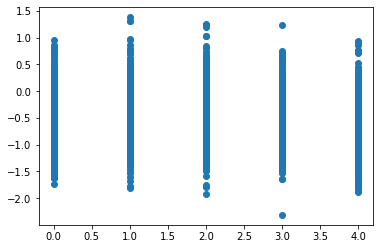

In [107]:
plt.scatter(data['day_of_week'],data['log_RV_sc_sqr'])

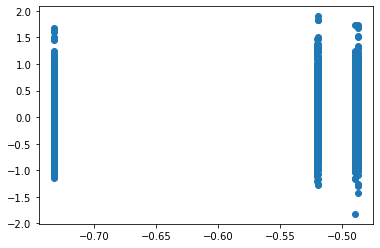

In [108]:
fit1_log = reg1_log.fittedvalues
res1_log = reg1_log.resid
plt.scatter(fit1_log,res1_log)

The residuals in the above graphs seem to have changing variance across 5 groups. However, the root of this phenomenon may be the existence of small number of outliers in each group. Thus, this may not harm the assumption of constant variance

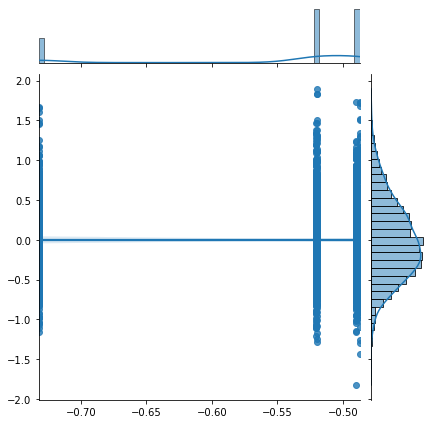

In [109]:
sns.jointplot(x=fit1_log, y=res1_log, kind="reg")

In [110]:
p, p_value = stats.pearsonr(fit1_log,res1_log)
p, p_value

(3.122502256758253e-17, 1.0000000000025966)

From the above plot, equally spread residuals around a horizontal line without distinct patterns, that is a good indication of constant variance across groups. On the other hand, the regression line of estimated residuals to the fitted values is a perfect horizontal line through the origin $O(0,0)$ associated with the result of testing hypotheses $H_{\text{0}}: \rho = 0$ versus $H_{\text{1}}: \rho \neq 0$, the p-value of nearly one claim that this correlation coefficient is significantly around zero. Thus, the true linearity relationship may be assured.

In [111]:
data['res_1_log']=res1_log

In [112]:
stats.describe(data.loc[data['Mon']==1, 'res_1_log'])

DescribeResult(nobs=494, minmax=(-1.2067278165388162, 1.471415034858115), mean=5.609547913895527e-16, variance=0.24755071002995277, skewness=0.34311530809078, kurtosis=-0.08456199135776332)

In [113]:
stats.describe(data.loc[data['Tues']==1, 'res_1_log'])

DescribeResult(nobs=523, minmax=(-1.287528233961078, 1.8988276857378967), mean=5.841938362845948e-16, variance=0.24510195058696005, skewness=0.6673997285468902, kurtosis=0.785010791797919)

In [114]:
stats.describe(data.loc[data['Wed']==1, 'res_1_log'])

DescribeResult(nobs=508, minmax=(-1.437400313141354, 1.7332301379665873), mean=2.937282962787816e-16, variance=0.23783099879630665, skewness=0.4993666032359995, kurtosis=0.7615592926465871)

In [115]:
stats.describe(data.loc[data['Thurs']==1, 'res_1_log'])

DescribeResult(nobs=502, minmax=(-1.8226583240350411, 1.7263596486305481), mean=4.529356084526535e-16, variance=0.24507361353793958, skewness=0.2676907489211655, kurtosis=-0.008369798908816506)

In [116]:
stats.describe(data.loc[data['Fri']==1, 'res_1_log'])

DescribeResult(nobs=473, minmax=(-1.15438423249953, 1.6744737353767385), mean=4.0559521914424324e-16, variance=0.2665492613811949, skewness=0.38966733260403186, kurtosis=-0.019523110967852197)

The sample mean of residuals given the observation is in Monday group is $5.609547913895527\times10^{-16}$, which suggests $E(\varepsilon_{i,Monday}|Monday)=0$ may hold.

The sample mean of residuals given the observation is in Tuesday group is $5.841938362845948\times10^{-16}$, which suggests $E(\varepsilon_{i,Tuesday}|Tuesday)=0$ may hold.

The sample mean of residuals given the observation is in Wednesday group is $2.937282962787816\times10^{-16}$, which suggests $E(\varepsilon_{i,Wednesday}|Wednesday)=0$ may hold.

The sample mean of residuals given the observation is in Thursday group is $4.529356084526535\times10^{-16}$, which suggests $E(\varepsilon_{i,Thursday}|Thursday)=0$ may hold.

The sample mean of residuals given the observation is in Friday group is $4.0559521914424324\times10^{-16}$, which suggests $E(\varepsilon_{i,Friday}|Friday)=0$ may hold.

<AxesSubplot:xlabel='log_RV_sc_sqr', ylabel='Count'>

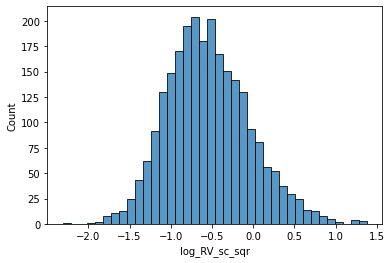

In [117]:
sns.histplot(data['log_RV_sc_sqr'], kde=False)

Assumptions of one-way ANOVA test:

$1/$ Linearity ($E(Y|X=j)=\mu_{j}$  for $j=1,...,5$): the residual plot suggests that linearity could hold and the discussion of relationship of residuals and fitted values above further consolidates this claim. Thus, this assumption may be met.

$2/$ Exogeneity ($E(\varepsilon|X=j)=0$ for $j=1,...,5$): the residuals against predicted values plot suggests that $E(\varepsilon|X=j)\approx0$ for $j=1,...,5$. Furthermore, the sample mean of residuals in each group is also approximately zero as discussed above, which suggests this assumption may be met.

$3/$ The data are independent and identically distributed in each group: this assumes the distribution of the log of square root of 5 min RV is the same within each group and is only affected by day of the week, meaning no other factor determining the log of square root of 5 min RV changes between different days of the week. Further, financial theory does say (strongly) that market efficiency implies that returns should be independent and identically distributed ("strong efficiency") and certainly uncorrelated ("weak efficiency") over time.Thus, the log of the square root of 5 min RV may be independent among groups. Hence, this assumption may be met. 

However, it should be noted that from the time series plot, the log of RV displays a strong pattern over time: there are periods of persistent high volatility and at other times periods of  persistent low volatility. High values of the log of RV tend to follow high values of the log of RV; and vice versa. Thus, this may be detrimental to the validity of the assumption and in such case, data thinning may have helped remove any autocorrelation here.

$4/$ The data in each group have finite forth moments ($E(Y_{j}^4)<\infty$ for $j=1,...,5$): according to the exploratory analysis of log of the root mean square of 5 min RV, although there are numerous outliers, the Fisher's kurtosis turns out to be around 0 and the distribtion observed via the histogram is relatively symmetric. On the other hand, the Fisher's kurtosis for the log of the root mean square of 5 min RV of Monday, Tuesday, Wednesday, Thursday and Friday are -0.08, 0.79, 0.76, -0.01 and -0.02 respectively. Besides, it should be noted the fact that the financial nature of return volatility allows the square root of 5 min RV values have the lower bound of 0, which is hardly reached in real life situation and are likely to have an upper bound. Thus, the log of the square root of 5 min RV values may be considered as a bounded random variable. Thus, this assumption may be met.

$5/$ $n_{j} \geq 30$ for $j=1,...,5$: 494, 523, 508, 502, and 473 are respectively the number of observations originating from Monday, Tuesday, Wednesday, Thursday and Friday groups. Thus, it is sufficient to conclude that this assumption is met.

$6/$ Equality of variances across the groups ($Var(Y|X=j)= \sigma^2$ for $j=1,...,5$): according to the residuals against predicted values plot, the variance of the residuals seems to remain constant due to  equally spread residuals around a horizontal line without distinct patterns. Furthermore, the sample variance of residuals for Monday, Tuesday, Wednesday, Thursday and Friday groups are 0.25,0.25,0.24,0.25, and 0.26 respectively, which are relatively invaried,  suggesting this assumption may be satisfied.

<span style="color:red">Differences assessment - the log of the square root of 5 min RV and day of the week</span>

In [118]:
dif1_log=MultiComparison(data['log_RV_sc_sqr'],data['day_of_week'])
result1_log = dif1_log.tukeyhsd()
print(result1_log)

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     0      1   0.0008    0.9 -0.0845  0.0861  False
     0      2   0.0331  0.809 -0.0529   0.119  False
     0      3   0.0302 0.8621  -0.056  0.1164  False
     0      4   -0.212  0.001 -0.2995 -0.1245   True
     1      2   0.0323 0.8149 -0.0524   0.117  False
     1      3   0.0294 0.8688 -0.0555  0.1144  False
     1      4  -0.2128  0.001 -0.2991 -0.1265   True
     2      3  -0.0029    0.9 -0.0884  0.0827  False
     2      4  -0.2451  0.001  -0.332 -0.1582   True
     3      4  -0.2422  0.001 -0.3294 -0.1551   True
----------------------------------------------------


Turkey's interval for the mean difference from Tuesday to Monday is $(-0.0845, 0.0861)$

Turkey's interval for the mean difference from Wednesday to Monday is $(-0.0529, 0.1190)$

Turkey's interval for the mean difference from Thursday to Monday is $(-0.0560, 0.1164)$

Turkey's interval for the mean difference from Friday to Monday is $(-0.2995, -0.1245)$

Turkey's interval for the mean difference from Wednesday to Tuesday is $(-0.0524, 0.1170)$

Turkey's interval for the mean difference from Thursday to Tuesday is $(-0.0555, 0.1144)$

Turkey's interval for the mean difference from Friday to Tuesday is $(-0.2991, -0.1265)$

Turkey's interval for the mean difference from Thursday to Wednesday is $(-0.0884, 0.0827)$

Turkey's interval for the mean difference from Friday to Wednesday is $(-0.3320, -0.1582)$

Turkey's interval for the mean difference from Friday to Thursday is $(-0.3294, -0.1551)$

In this case, while the differences between Monday and Friday, Tuesday and Friday, Wednesday and Friday, Thursday and Friday are significant and the differences of the other pairs are not statistically significant in terms of the square root of 5 min RV at $\alpha = 0.05$.

<span style="color:red">ANOVA test for log of the square root of 5 min RV and season of the year</span>

In [119]:
reg2_log= smf.ols(formula='log_RV_sc_sqr ~ C(Season)',data=data).fit()
reg2_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          log_RV_sc_sqr   R-squared:                       0.013
Model:                            OLS   Adj. R-squared:                  0.012
Method:                 Least Squares   F-statistic:                     11.07
Date:                Fri, 07 May 2021   Prob (F-statistic):           3.23e-07
Time:                        14:50:22   Log-Likelihood:                -1826.8
No. Observations:                2500   AIC:                             3662.
Df Residuals:                    2496   BIC:                             3685.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -0.6446      0.021    -31.424      0.000      -0.685      -0.604
C(Season)[T.2]     0.1021      0.029      3.570      0.000       0.046       0.158
C(Season)[T.3]     0.1560      0.029      5.446      0.000       0.100       0.212
C(Season)[T.4]     0.1259      0.029      4.389      0.000       0.070       0.182
==============================================================================
Omnibus:                       70.439   Durbin-Watson:                   0.823
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               76.289
Skew:                           0.406   Prob(JB):                     2.72e-17
Kurtosis:                       3.271   Cond. No.                         4.87
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

$\widehat{log(\sqrt{\text{5 min RV}})} = -0.6446 + 0.1021\times D_{\text{Autumn}}+0.1560\times D_{\text{Winter}}+0.1259\times D_{\text{Spring}}$

This is actually five predictions for the log of the square root of 5 min RV, one for each category of day. These are:

$\widehat{log(\sqrt{\text{5 min RV}})} = -0.6446$, when $D_{\text{Autumn}} = D_{\text{Winter}} = D_{\text{Spring}}=0$

$\widehat{\sqrt{\text{5 min RV}}} = -0.6446+0.1021=-0.5425$, when $D_{\text{Winter}} = D_{\text{Spring}}=0$, $D_{\text{Autumn}} = 1$

$\widehat{\sqrt{\text{5 min RV}}} = -0.6446+0.1560=-0.4886$, when $D_{\text{Autumn}} = D_{\text{Spring}}=0$, $D_{\text{Winter}} = 1$

$\widehat{\sqrt{\text{5 min RV}}} = -0.6446+0.1259=-0.5187$, when $D_{\text{Autumn}} = D_{\text{Winter}} =0$, $D_{\text{Spring}}=1$

The simple interpretation is that we predict the log of the square root of 5 min RV to be, on average: -0.6446 in Summer; -0.5425 in Autumn; -0.4886 in Winter, -0.5187 in Spring.

Other than that, considering 3 tests regarding $H_0$: $\beta_{i} =0$ vs $H_1$: $\beta_{i} \neq 0$ for i=1,2,3 at $\alpha = 0.05$, the p-values for each i are 0.000 and such results imply that we can reject the null hypotheses in 3 cases and the linear relationships between the log of the square root of 5 min RV and $D_{\text{Autumn}}$, $D_{\text{Winter}}$, $D_{\text{Spring}}$ are significant.

In [120]:
data['fit2_log']=reg2_log.fittedvalues

Back-transform predictions

In [121]:
y=np.zeros(4)
j=0
for i in ['Summer','Autumn','Winter','Spring']:
    y[j]= np.exp(np.mean(data.loc[data[i]==1, 'fit2_log']))
    print('the back-transform predicted value for oberservation in group {} is {}%'.format(i,y[j]))
    j=j+1
y

the back-transform predicted value for oberservation in group Summer is 0.5248732334313975%
the back-transform predicted value for oberservation in group Autumn is 0.5812960617443732%
the back-transform predicted value for oberservation in group Winter is 0.613469490216904%
the back-transform predicted value for oberservation in group Spring is 0.5952884144506445%


array([0.52487323, 0.58129606, 0.61346949, 0.59528841])

In [122]:
data['fit2_log_real']=np.exp(reg2_log.fittedvalues)

In [123]:
RSS = np.sum((data['fit2_log_real']-data['RV_sc_sqr'])**2)
MSE = RSS/(2500-4)
SER = MSE**0.5
TSS = (np.std(data['RV_sc_sqr'])**2)*2500
R_squared = 1 - (RSS/TSS)
R_squared_adjusted = 1 - (RSS/TSS)*((2500-1)/(2500-4))
print(SER, R_squared, R_squared_adjusted)


0.40834972031159017 -0.035948776595500886 -0.03719390733660122


Normal predictions

In [124]:
y=np.zeros(4)
j=0
for i in ['Summer','Autumn','Winter','Spring']:
    y[j]=np.exp(np.mean(data.loc[data[i]==1, 'fit2_log']))*np.exp(reg2_log.mse_resid/2)
    print('the normal predicted value for oberservation in group {} is {}%'.format(i,y[j]))
    j=j+1

the normal predicted value for oberservation in group Summer is 0.5956167768371619%
the normal predicted value for oberservation in group Autumn is 0.6596443953158314%
the normal predicted value for oberservation in group Winter is 0.6961542276830299%
the normal predicted value for oberservation in group Spring is 0.675522667417446%


In [125]:
data['fit2_log_real']=np.exp(reg2_log.fittedvalues)*np.exp(reg2_log.mse_resid/2)

In [126]:
RSS = np.sum((data['fit2_log_real']-data['RV_sc_sqr'])**2)
MSE = RSS/(2500-4)
SER = MSE**0.5
TSS = (np.std(data['RV_sc_sqr'])**2)*2500
R_squared = 1 - (RSS/TSS)
R_squared_adjusted = 1 - (RSS/TSS)*((2500-1)/(2500-4))
print(SER, R_squared, R_squared_adjusted)

0.39965978803775504 0.007673328534878676 0.006480628208598405


Duan predictions

In [127]:
E=np.mean(np.exp(reg2_log.resid))
y=np.zeros(4)
j=0
for i in ['Summer','Autumn','Winter','Spring']:
    y[j]= np.exp(np.mean(data.loc[data[i]==1, 'fit2_log']))*E
    print('the normal predicted value for oberservation in group {} is {}%'.format(i,y[j]))
    j=j+1

the normal predicted value for oberservation in group Summer is 0.6009774480864829%
the normal predicted value for oberservation in group Autumn is 0.6655813280589333%
the normal predicted value for oberservation in group Winter is 0.7024197562889408%
the normal predicted value for oberservation in group Spring is 0.6816025078153592%


In [128]:
data['fit2_log_real']=np.exp(reg2_log.fittedvalues)*np.mean(np.exp(reg2_log.resid))

In [129]:
RSS = np.sum((data['fit2_log_real']-data['RV_sc_sqr'])**2)
MSE = RSS/(2500-4)
SER = MSE**0.5
TSS = (np.std(data['RV_sc_sqr'])**2)*2500
R_squared = 1 - (RSS/TSS)
R_squared_adjusted = 1 - (RSS/TSS)*((2500-1)/(2500-4))
print(SER, R_squared, R_squared_adjusted)

0.3996190732526131 0.007875502035746385 0.0066830447064624154


As it can be seen that among three prediction options, Duan prediction method results in the lowest SER and highest $R^2$ and $R^2_{adjusted}$. Thus, the prediction and model's strength of fit measurement via this method will be used as a benchmark to compare with other models.

It can be seen that as $R^{2} = 0.0079$ and $R^{2}_{\text{adjusted}}=0.0067$, the linear relationship estimated above is statistically weak. Besides, the SER of 0.3996% of the model needs to be examined cautiuosly by financial consultant regarding whether this is significant in this case. 

In [130]:
table2_log= sm.stats.anova_lm(reg2_log, typ=3)
table2_log

,sum_sq,df,F,PR(>F)
Intercept,249.719847,1.0,987.497922,6.344524e-183
C(Season),8.397786,3.0,11.069466,3.226895e-07
Residual,631.191950,2496.0,NaN,NaN


The hypotheses here are:

$H_{0}$: $\mu_{1}=...=\mu_{4}$, means are the same across 4 seasons

$H_{1}$: $\exists i,j \in \{1,2,3,4\}$, $i \neq j$ and $\mu_{i}\neq\mu_{j}$, at least two means are different across 4 seasons

For $\mu_{1}$, $\mu_{2}$, $\mu_{3}$, and $\mu_{4}$ are the mean of the log the square root of 5 min RV in Summer, Autumn, Winter, and Spring respectively.

We choose $\alpha=0.05$ as standard. 

The test statistics is $F_{\text{stat}} =11.069466$, which has a F distribution with $m-1 = 4-1=3$ degrees of freedom in numerator and $n-m=2500-4=2496$ degrees of freedom in denominator, , if the null of equality of means is, and the LSA 1-6 assumptions are also, true. 

The chance that the resulting F value would be more extreme than 11.069466, in the direction of the alternative hypothesis which is more or greater than, is very close to 0. Specifically, the p-value is $P(F_{3,2496} > 11.069466) = 3.226895\times10^{-07}$. 

Hence, such p-value is $< 0.05$, it is statistically sufficient for us to reject the null and conclude that mean of log of the mean RV of difference seasons of a year is difference from each other. In other words, the root square of 5 min RV may be affected by season of the year.

<span style="color:red">Assumptions assessment</span>

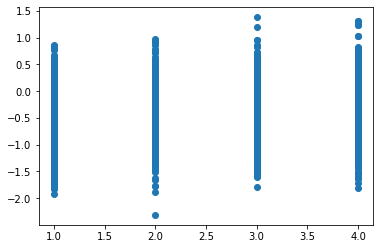

In [131]:
plt.scatter(data['Season'],data['log_RV_sc_sqr'])

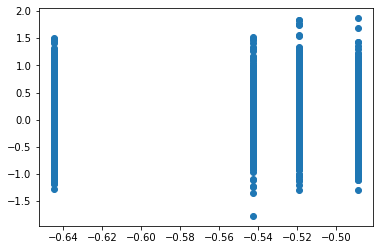

In [132]:
fit2_log = reg2_log.fittedvalues
res2_log = reg2_log.resid
plt.scatter(fit2_log,res2_log)

The variance of residuals seem to be constant across the 4 groups according to the above graph.

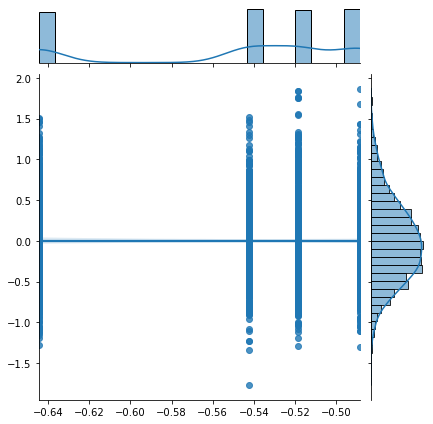

In [133]:
sns.jointplot(x=fit2_log, y=res2_log, kind="reg")

In [134]:
p, p_value = stats.pearsonr(fit2_log,res2_log)
p, p_value

(-5.898059818321144e-17, 1.000000000002478)

From the above plot, equally spread residuals around a horizontal line without distinct patterns, that is a good indication of constant variance across the groups. On the other hand, the regression line of estimated residuals to the fitted values is a perfect horizontal line through the origin $O(0,0)$ associated with the result of testing hypotheses $H_{\text{0}}: \rho = 0$ versus $H_{\text{1}}: \rho \neq 0$, the p-value of nearly one claim that this correlation coefficient is significantly around zero. Thus, the true linearity relationship may be assured.

In [135]:
data['res_2_log']=res2_log

In [136]:
stats.describe(data.loc[data['Summer']==1, 'res_2_log'])

DescribeResult(nobs=601, minmax=(-1.2799843880255284, 1.5104855456474011), mean=-1.064040702469368e-16, variance=0.27252533543122043, skewness=0.3573846974945803, kurtosis=-0.033587403210927125)

In [137]:
stats.describe(data.loc[data['Autumn']==1, 'res_2_log'])

DescribeResult(nobs=637, minmax=(-1.77020495523104, 1.524633270991417), mean=1.2269968749389484e-16, variance=0.2151205525703356, skewness=0.22544798034171823, kurtosis=0.42926970475068815)

In [138]:
stats.describe(data.loc[data['Winter']==1, 'res_2_log'])

DescribeResult(nobs=633, minmax=(-1.2985875053585998, 1.8679836481330923), mean=-1.7960005959181047e-16, variance=0.24237041267585252, skewness=0.27648965733308484, kurtosis=0.10248778723276875)

In [139]:
stats.describe(data.loc[data['Spring']==1, 'res_2_log'])

DescribeResult(nobs=629, minmax=(-1.2863772617905485, 1.8360452551327948), mean=-1.0166748206424327e-16, variance=0.28293308324573446, skewness=0.6683613232250089, kurtosis=0.4571072842263715)

The sample mean of residuals given the observation is in Summer group is $-1.064040702469368e\times10^{-16}$, which suggests $E(\varepsilon_{i,Summer}|Summer)=0$ may hold.

The sample mean of residuals given the observation is in Autumn group is $1.2269968749389484\times10^{-16}$, which suggests $E(\varepsilon_{i,Autumn}|Autumn)=0$ may hold.

The sample mean of residuals given the observation is in Winter group is $-1.7960005959181047\times10^{-16}$, which suggests $E(\varepsilon_{i,Winter}|Winter)=0$ may hold.

The sample mean of residuals given the observation is in Spring group is $-1.0166748206424327\times10^{-16}$, which suggests $E(\varepsilon_{i,Spring}|Spring)=0$ may hold.

<AxesSubplot:xlabel='log_RV_sc_sqr', ylabel='Count'>

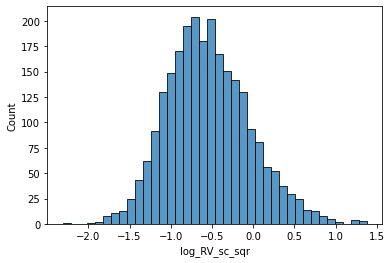

In [140]:
sns.histplot(data['log_RV_sc_sqr'], kde=False)

Assumptions of one-way ANOVA test:

$1/$ Linearity ($E(Y|X=j)=\mu_{j}$  for $j=1,...,4$): the residual plot suggests that linearity could hold and the discussion of relationship of residuals and fitted values above further consolidates this claim. Thus, this assumption may be met.

$2/$ Exogeneity ($E(\varepsilon|X=j)=0$ for $j=1,...,4$): the residuals against predicted values plot suggests that $E(\varepsilon_{i,j}|X=j)\approx0$ for $j=1,...,4$. Furthermore, the sample mean of residuals in each group is also approximately zero as discussed above, which suggests this assumption may be met.

$3/$ The data are independent and identically distributed in each group: this assumes the distribution of the log of square root of 5 min RV is the same within each group and is only affected by season of the year, meaning no other factor determining the log of square root of 5 min RV changes between different season of the year. Further, financial theory does say (strongly) that market efficiency implies that returns should be independent and identically distributed ("strong efficiency") and certainly uncorrelated ("weak efficiency") over time. Thus, the log of the square root of 5 min RV may be independent among groups. Hence, this assumption may be met.

However, it should be noted that from the time series plot, the log of RV displays a strong pattern over time: there are periods of persistent high volatility and at other times periods of  persistent low volatility. High values of the log of RV tend to follow high values of the log of RV; and vice versa. Thus, this may be detrimental to the validity of the assumption and in such case, data thinning may have helped remove any autocorrelation here.

$4/$ The data in each group have finite forth moments ($E(Y_{j}^4)<\infty$ for $j=1,...,4$): According to the exploratory analysis of log of the root mean square of 5 min RV, although there are numerous outliers, the Fisher's kurtosis turns out to be around 0 and the distribtion observed via the histogram is relatively symmetric. On the other hand, the kurtosis for log of the root mean square of 5 min RV of Summer, Autumn, Winter, and Spring are -0.03, 0.43, 0.10, and 0.46 respectively. Besides, it should be noted the fact that the financial nature of return volatility allows the square root of 5 min RV values have the lower bound of 0, which is hardly reached in real life situation and are likely to have an upper bound. Thus, the log of the square root of 5 min RV values may be considered as a bounded random variable. Thus, this assumption may be met.

$5/$ $n_{j} \geq 30$ for $j=1,...,4$: 601,633,627,639 are respectively the number of observations originating from Summer, Autumn, Winter, and Spring groups. Thus, it is sufficient to conclude that this assumption is met.

$6/$ Equality of variances across the groups ($Var(Y|X=j)= \sigma^2$ for $j=1,...,4$): according to the residuals against predicted values plot, the variance of the residuals seems to remain constant due to  equally spread residuals around a horizontal line without distinct patterns. Furthermore, the sample variance of residuals for Summer, Autumn, Winter, and Spring groups are 0.27, 0.22, 0.24, and 0.28 respectively, which are quite varied but this may or may not be due to the influence of outliers, suggesting this assumption may be satisfied in general. However, to be cautious, a Het-robust version of this ANOVA test should be conducted, which is illustrated as below. 

In [141]:
reg2_log_new= smf.ols(formula='log_RV_sc_sqr ~ C(Season)',data=data).fit(cov_type='HC0')
reg2_log_new.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          log_RV_sc_sqr   R-squared:                       0.013
Model:                            OLS   Adj. R-squared:                  0.012
Method:                 Least Squares   F-statistic:                     10.59
Date:                Fri, 07 May 2021   Prob (F-statistic):           6.40e-07
Time:                        14:50:27   Log-Likelihood:                -1826.8
No. Observations:                2500   AIC:                             3662.
Df Residuals:                    2496   BIC:                             3685.
Df Model:                           3                                         
Covariance Type:                  HC0                                         
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -0.6446      0.021    -30.296      0.000      -0.686      -0.603
C(Season)[T.2]     0.1021      0.028      3.633      0.000       0.047       0.157
C(Season)[T.3]     0.1560      0.029      5.398      0.000       0.099       0.213
C(Season)[T.4]     0.1259      0.030      4.192      0.000       0.067       0.185
==============================================================================
Omnibus:                       70.439   Durbin-Watson:                   0.823
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               76.289
Skew:                           0.406   Prob(JB):                     2.72e-17
Kurtosis:                       3.271   Cond. No.                         4.87
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC0)
"""

$\widehat{log(\sqrt{\text{5 min RV}})} = -0.6446 + 0.1021\times D_{\text{Autumn}}+0.1560\times D_{\text{Winter}}+0.1259\times D_{\text{Spring}}$

This is actually five predictions for the log of the square root of 5 min RV, one for each category of day. These are:

$\widehat{\sqrt{\text{5 min RV}}} = -0.6446$, when $D_{\text{Autumn}} = D_{\text{Winter}} = D_{\text{Spring}}=0$

$\widehat{\sqrt{\text{5 min RV}}} = -0.6446+0.1021=-0.5425$, when $D_{\text{Winter}} = D_{\text{Spring}}=0$, $D_{\text{Autumn}} = 1$

$\widehat{\sqrt{\text{5 min RV}}} = -0.6446+0.1560=-0.4886$, when $D_{\text{Autumn}} = D_{\text{Spring}}=0$, $D_{\text{Winter}} = 1$

$\widehat{\sqrt{\text{5 min RV}}} = -0.6446+0.1259=-0.5187$, when $D_{\text{Autumn}} = D_{\text{Winter}} =0$, $D_{\text{Spring}}=1$

The simple interpretation is that we predict the log of the square root of 5 min RV to be, on average: -0.6446 in Summer; -0.5425 in Autumn; -0.4886 in Winter, -0.5187 in Spring.

In [142]:
table2_log_new= sm.stats.anova_lm(reg2_log_new, typ=2)
table2_log_new

,sum_sq,df,F,PR(>F)
C(Season),8.036492,3.0,10.593229,6.399580e-07
Residual,631.191950,2496.0,NaN,NaN


The hypotheses here are:

$H_{0}$: $\mu_{1}=...=\mu_{4}$, means are the same across 4 seasons

$H_{1}$: $\exists i,j \in \{1,2,3,4\}$, $i \neq j$ and $\mu_{i}\neq\mu_{j}$, at least two means are different across 4 seasons

For $\mu_{1}$, $\mu_{2}$, $\mu_{3}$, and $\mu_{4}$ are the mean of the log of the square root of 5 min RV in Summer, Autumn, Winter, and Spring respectively.

We choose $\alpha=0.05$ as standard. 

The test statistics is $F_{\text{stat}} =10.593229$, which has a F distribution with $m-1 = 4-1=3$ degrees of freedom in numerator and $n-m=2500-4=2496$ degrees of freedom in denominator, , if the null of equality of means is, and the LSA 1-5 assumptions are also, true. 

The chance that the resulting F value would be more extreme than 10.593229, in the direction of the alternative hypothesis which is more or greater than, is very close to 0. Specifically, the p-value is $P(F_{3,2496} > 10.593229) = 6.399580\times10^{-07}$. 

Hence, such p-value is $< 0.05$, it is statistically sufficient for us to reject the null and conclude that the mean RV of difference seasons of a year is difference from each other. In other words, the root square of 5 min RV may be affected by season of the year.

<span style="color:red">Differences assessment - the log of square root of 5 min RV and season of the year</span>

In [143]:
dif2_log=MultiComparison(data['log_RV_sc_sqr'],data['Season'])
result2_log = dif2_log.tukeyhsd()
print(result2_log)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     1      2   0.1021 0.0021  0.0286 0.1756   True
     1      3    0.156  0.001  0.0823 0.2296   True
     1      4   0.1259  0.001  0.0521 0.1996   True
     2      3   0.0539 0.2246 -0.0187 0.1264  False
     2      4   0.0238 0.8129 -0.0489 0.0965  False
     3      4  -0.0301 0.6888 -0.1029 0.0427  False
---------------------------------------------------


Turkey's interval for the mean difference from Autumn to Summer is $(0.0286, 0.1756)$

Turkey's interval for the mean difference from Winter to Summer is $(0.0823, 0.2296)$

Turkey's interval for the mean difference from Spring to Monday is $(0.0521 0.1996)$

Turkey's interval for the mean difference from Winter to Autumn is $(-0.0187, 0.1264)$

Turkey's interval for the mean difference from Spring to Autumn is $(-0.0489, 0.0965)$

Turkey's interval for the mean difference from Spring to Winter is $(-0.1029, 0.0427)$

In this case, while the differences between Summer and Autumn, Summer and Winter, Summer and Springe are significant and the differences of the other pairs are not statistically significant in terms of the square root of 5 min RV at $\alpha = 0.05$.

<span style="color:red">Comparison results of the tests using the log transformation and the tests not using log transformation</span>

Affect of day of the week on the square root of 5 min RV: although the two models come up with different F statistics and p-values, both results all agree that  the root square of 5 min RV may be affected by day of the week. Considering goodness of fit, both tests have their assumptions satisfied well. Nevertheless, regarding the forth moment assumption, the log transformation can ease the influence of outliers via a much significant lower level in kurtosis across 5 groups and thus, makes this assumption is more reliable in the test using log transformation. Regarding strength of fit, the log transformation has degenerated the model slightly with $R^{2} = 0.0177$ and $R^{2}_{\text{adjusted}}=0.0161$, SER=0.3977% while those of the model without any transformation are $R^{2} = 0.018$ and $R^{2}_{\text{adjusted}}=0.016$, SER=0.3977%.

Affect of season of the year on the square root of 5 min RV: although the two models come up with different F statistics and p-values, both results all agree that  the root square of 5 min RV may be affected by day of the week. Considering goodness of fit, both tests have their assumptions satisfied well. Nevertheless, regarding the forth moment assumption, the log transformation can ease the influence of outliers via a much significant lower level in kurtosis across 4 groups and thus, makes this assumption is more reliable in the test using log transformation. Regarding strength of fit, the log transformation has improved the model significantly with $R^{2} = 0.0079$ and $R^{2}_{\text{adjusted}}=0.0067$, SER=0.3996% while those of the model without any transformation are $R^{2} = 0.009$ and $R^{2}_{\text{adjusted}}=0.008$, SER=0.3994%.

# Part 3: Discussion on data cleaning and manipulation

Once again we cannot just remove data points that we do not like or outliers, just because they do not suit the ANOVA test's assumptions. No data cleaning is required or should be done here.

Cleaning data: there is no reason to delete outlying square root of 5 min RV from the data in the subsequent analysis, regression and subsequent ANOVA tests below. There is no need for data cleaning at this stage, unless we are aware of
errors in the data (which we are not). Data should not be deleted or removed unless it is known to be in error.

Data manipulation: since in the orginial data, the square root of 5 min RV variable distribution contains of a small number of extreme outlying value, making any visulizations very unclear and not allowing assessment of any potential relationship or the distribution of non-outlying value. These outliers cast immediate doubt on the finite 4th moment assumption in one-way ANOVA test. Thus, log transformation for the square root of 5 min RV variable to come up with a new variable, which is the log of the square root of 5 min RV variable is necessary to ease the influence of outliers on the results of one-way and two-way ANOVA test.

Data thining

# Part 4: Two-way ANOVA tests

<span style="color:red">Two-way ANOVA test for the square root of 5 min RV and day of the week & season of the year</span>

In [144]:
reg3 = smf.ols(formula='RV_sc_sqr ~ C(day_of_week)+C(Season)+C(day_of_week):C(Season)', data=data).fit()
reg3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              RV_sc_sqr   R-squared:                       0.033
Model:                            OLS   Adj. R-squared:                  0.026
Method:                 Least Squares   F-statistic:                     4.464
Date:                Fri, 07 May 2021   Prob (F-statistic):           4.29e-10
Time:                        14:50:27   Log-Likelihood:                -1220.1
No. Observations:                2500   AIC:                             2480.
Df Residuals:                    2480   BIC:                             2597.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Intercept                              0.6122      0.036     17.015      0.000       0.542       0.683
C(day_of_week)[T.1]                    0.0339      0.051      0.666      0.505      -0.066       0.134
C(day_of_week)[T.2]                    0.0442      0.051      0.872      0.383      -0.055       0.144
C(day_of_week)[T.3]                    0.0514      0.051      1.001      0.317      -0.049       0.152
C(day_of_week)[T.4]                   -0.1613      0.051     -3.156      0.002      -0.261      -0.061
C(Season)[T.2]                         0.0758      0.050      1.507      0.132      -0.023       0.174
C(Season)[T.3]                         0.0928      0.051      1.827      0.068      -0.007       0.192
C(Season)[T.4]                         0.0889      0.051      1.759      0.079      -0.010       0.188
C(day_of_week)[T.1]:C(Season)[T.2]    -0.0696      0.070     -0.989      0.323      -0.208       0.068
C(day_of_week)[T.2]:C(Season)[T.2]    -0.0597      0.071     -0.844      0.399      -0.198       0.079
C(day_of_week)[T.3]:C(Season)[T.2]    -0.0866      0.071     -1.221      0.222      -0.226       0.053
C(day_of_week)[T.4]:C(Season)[T.2]     0.0447      0.073      0.614      0.539      -0.098       0.188
C(day_of_week)[T.1]:C(Season)[T.3]    -0.0286      0.071     -0.403      0.687      -0.168       0.111
C(day_of_week)[T.2]:C(Season)[T.3]    -0.0526      0.071     -0.738      0.460      -0.192       0.087
C(day_of_week)[T.3]:C(Season)[T.3]    -0.0475      0.072     -0.656      0.512      -0.190       0.094
C(day_of_week)[T.4]:C(Season)[T.3]     0.1195      0.071      1.675      0.094      -0.020       0.259
C(day_of_week)[T.1]:C(Season)[T.4]    -0.0145      0.071     -0.204      0.838      -0.154       0.125
C(day_of_week)[T.2]:C(Season)[T.4]     0.0286      0.071      0.401      0.689      -0.111       0.168
C(day_of_week)[T.3]:C(Season)[T.4]     0.0034      0.071      0.048      0.962      -0.136       0.143
C(day_of_week)[T.4]:C(Season)[T.4]    -0.0195      0.072     -0.269      0.788      -0.161       0.122
==============================================================================
Omnibus:                     1418.688   Durbin-Watson:                   0.795
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            14405.454
Skew:                           2.523   Prob(JB):                         0.00
Kurtosis:                      13.622   Cond. No.                         28.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

$\widehat{\sqrt{\text{5 min RV}}} = 0.6122 + 0.0339\times D_{\text{Tues}}+0.0442\times D_{\text{Wed}}+0.0514\times D_{\text{Thurs}}- 0.1613\times D_{\text{Thurs}}+0.0758\times D_{\text{Autumn}}+0.0928\times D_{\text{Winter}}+0.0889\times D_{\text{Spring}}-0.0696\times D_{\text{Tues}}\times D_{\text{Autumn}}-0.0597\times D_{\text{Wed}}\times D_{\text{Autumn}}-0.0866\times D_{\text{Thurs}}\times D_{\text{Autumn}}+0.0447\times D_{\text{Thurs}}\times D_{\text{Autumn}}-0.0286\times D_{\text{Tues}}\times D_{\text{Winter}}-0.0526\times D_{\text{Wed}}\times D_{\text{Winter}}-0.0475\times D_{\text{Thurs}}\times D_{\text{Winter}}+0.1195\times D_{\text{Thurs}}\times D_{\text{Winter}}-0.0145\times D_{\text{Tues}}\times D_{\text{Spring}}+0.0286\times D_{\text{Wed}}\times D_{\text{Spring}}+0.0034\times D_{\text{Thurs}}\times D_{\text{Spring}}-0.0195\times D_{\text{Thurs}}\times D_{\text{Spring}}$


Other than that, considering 4 tests regarding $H_0$: $\beta_{i} =0$ vs $H_1$: $\beta_{i} \neq 0$ for i=1,2,...,19 at $\alpha = 0.05$, among all provided p-values for each i, only p-value for i=4 is lower than 0.05, which 0.002implying that we can only reject the null hypotheses in case i=4 and that the $D_{\text{Fri}} and the square root of 5 min RV are significantly linearly related while the linear relationships between the square root of 5 min RV and other mentioned dummy and interaction variables and are insignificant.

In [145]:
data['fit3']=reg3.fittedvalues
for i in ('Mon','Tues','Wed','Thurs','Fri'):
    for j in ('Summer','Autumn','Winter','Spring'):
        print('----------------------------------------------------------')
        print('If the observation is in {}-{} group, its predicted square root of 5 min RV value should be {}%'.format(i,j,np.mean(data.loc[data[i]+data[j]==2, 'fit3'])))
        print('----------------------------------------------------------')

----------------------------------------------------------
If the observation is in Mon-Summer group, its predicted square root of 5 min RV value should be 0.6122057528371889%
----------------------------------------------------------
----------------------------------------------------------
If the observation is in Mon-Autumn group, its predicted square root of 5 min RV value should be 0.6879731085382639%
----------------------------------------------------------
----------------------------------------------------------
If the observation is in Mon-Winter group, its predicted square root of 5 min RV value should be 0.7049626192046685%
----------------------------------------------------------
----------------------------------------------------------
If the observation is in Mon-Spring group, its predicted square root of 5 min RV value should be 0.7011545895446054%
----------------------------------------------------------
----------------------------------------------------------
I

In [146]:
reg3.mse_resid, reg3.mse_resid**0.5

(0.1566447841764137, 0.3957837593641428)

It can be seen that as $R^{2} = 0.033$ and $R^{2}_{\text{adjusted}}=0.026$, the linear relationship estimated above is statistically weak. Besides, the SER of 0.3958% of the model needs to be examined cautiuosly by financial consultant regarding whether this is significant in this case. 

In [147]:
table3= sm.stats.anova_lm(reg3, typ=3)
table3

,sum_sq,df,F,PR(>F)
Intercept,45.350302,1.0,289.510450,1.713593e-61
C(day_of_week),3.760581,4.0,6.001766,8.359947e-05
C(Season),0.691022,3.0,1.470465,2.206109e-01
C(day_of_week):C(Season),2.575617,12.0,1.370201,1.726991e-01
Residual,388.479065,2480.0,NaN,NaN


The hypotheses here are:

$H_{0}$: $\mu_{1,}=...=\mu_{5,.}$, means are the same across 5 days in the week

$H_{1}$: $H_{1}$: $\exists i,j \in \{1,2,3,4,5\}$, $i \neq j$ and $\mu_{i,.}\neq\mu_{j,.}$, at least two means are different across 5 days in the week

For $\mu_{1,.}$, $\mu_{2,.}$, $\mu_{3,.}$, $\mu_{4,.}$ and $\mu_{5,.}$ are the mean of the square root of 5 min RV on Monday, Tuesday, Wednesday, Thursday, and Friday respectively.

We choose $\alpha=0.05$ as standard. 

The test statistics is $F_{\text{stat}_{1}} =6.001766$, which has a F distribution with $m_{1}-1 = 5-1=4$ degrees of freedom in numerator and $n-m_{1}m_{2}=2500-5\times4=2480$ degrees of freedom in denominator, , if the null of equality of means is, and the LSA 1-6 assumptions are also, true. 

The chance that the resulting F value would be more extreme than 6.001766, in the direction of the alternative hypothesis which is more or greater than, is very close to 0. Specifically, the p-value is $P(F_{4,2480} > 6.001766) = 8.359947\times10^{-05}$. 

Hence, such p-value is $< 0.05$, it is statistically sufficient for us to reject the null and conclude that the mean of the root square of 5 min RV of difference seasons of a year is difference from each other. In other words, the root square of 5 min RV may be affected by season of the year.

The hypotheses here are:

$H_{0}$: $\mu_{.,1}=...=\mu_{.,4}$, means are the same across 4 seasons

$H_{1}$: $\exists i,j \in \{1,2,3,4\}$, $i \neq j$ and $\mu_{.,i}\neq\mu_{.,j}$, at least two means are different across 4 seasons

For $\mu_{.,1}$, $\mu_{.,2}$, $\mu_{.,3}$, and $\mu_{.,4}$ are the mean of the square root of 5 min RV in Summer, Autumn, Winter, and Spring respectively.

We choose $\alpha=0.05$ as standard. 

The test statistics is $F_{\text{stat}_{2}} =1.470465$, which has a F distribution with $m_{2}-1 = 4-1=3$ degrees of freedom in numerator and $n-m_{1}m_{2}=2500-5\times4=2480$ degrees of freedom in denominator, , if the null of equality of means is, and the LSA 1-6 assumptions are also, true. 

The chance that the resulting F value would be more extreme than 1.470465, in the direction of the alternative hypothesis which is more or greater than, is very close to 0. Specifically, the p-value is $P(F_{3,2480} > 1.470465) = 0.2206109$. 

Hence, such p-value is $> 0.05$, it is not statistically sufficient for us to reject the null and conclude that the mean the root square of 5 min RV of difference seasons of a year is not statistically difference from each other. In other words, the root square of 5 min RV may be not affected by season of the year.

The hypotheses here are:

$H_{0}$: $\mu_{\text{i,1}}=...=\mu_{\text{i,4}}$ $\forall i \in \{1,2,3,4,5\}$ and $\mu_{\text{1,j}}=...\mu_{\text{5,j}}$ $\forall j \in \{1,2,3,4\}$ all interaction effects between day of the week and season of the year are equal to 0

$H_{1}$: at least one of the above pairs (pair with either the same i index or j index) are different, at least one interaction effect between day of the week and season of the year is different from 0

For $\mu_{i,j}$ is the mean of the square root of 5 min RV in $i$ corresponding day and $j$ corresponding season. 

We choose $\alpha=0.05$ as standard. 

The test statistics is $F_{\text{stat}_{3}} =1.370201$, which has a F distribution with $(m_{2}-1)(m_{2}-1) = (5-1)\times(4-1)=12$ degrees of freedom in numerator and $n-m_{1}m_{2}=2500-5\times4=2480$ degrees of freedom in denominator, , if the null of 0 interaction effects are, and the LSA 1-6 assumptions are also, true. 

The chance that the resulting F value would be more extreme than 1.370201, in the direction of the alternative hypothesis which is more or greater than, is very close to 0. Specifically, the p-value is $P(F_{12,2480} > 1.370201) = 0.01726991$. 

Hence, such p-value is $> 0.05$, it is not statistically sufficient for us to reject the null and conclude that there is no interaction between day of the week and season of the year in determining the the root square of 5 min RV. In other words, day of the week and season of the year do not influence each other impact on the root square of 5 min RV.

<span style="color:red">Assumptions assessment</span>

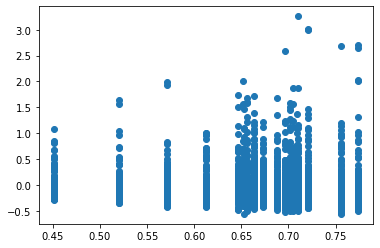

In [148]:
fit3 = reg3.fittedvalues
res3 = reg3.resid
plt.scatter(fit3,res3)

The residuals in the above graphs seem to have changing variance across 20 groups. However, the root of this phenomenon may be the existence of small number of outliers in each group. Thus, this may not harm the assumption of constant variance.

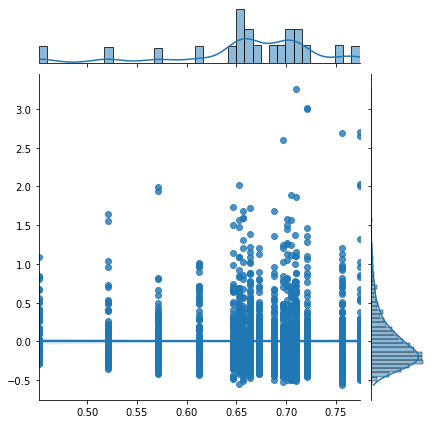

In [149]:
sns.jointplot(x=fit3, y=res3, kind="reg")

In [150]:
p, p_value = stats.pearsonr(fit3,res3)
p, p_value

(1.1405806854547507e-16, 1.000000000002478)

From the above plot, equally spread residuals around a horizontal line without distinct patterns, that is a good indication of constant variance across groups. On the other hand, the regression line of estimated residuals to the fitted values is a perfect horizontal line through the origin $O(0,0)$ associated with the result of testing hypotheses $H_{\text{0}}: \rho = 0$ versus $H_{\text{1}}: \rho \neq 0$, the p-value of nearly one claim that this correlation coefficient is significantly around zero. Thus, the true linearity relationship may be assured.

In [151]:
data['res3']=res3

In [152]:
for i in ('Mon','Tues','Wed','Thurs','Fri'):
    for j in ('Summer','Autumn','Winter','Spring'):
        print('----------------------------------------------------------')
        print('Numerical summary of observations in group {} and {}'.format(i,j))
        print(stats.describe(data.loc[(data[i]+data[j])==2, 'RV_sc_sqr']))
        print('----------------------------------------------------------')

----------------------------------------------------------
Numerical summary of observations in group Mon and Summer
DescribeResult(nobs=121, minmax=(0.17781973316971122, 1.623201601133199), mean=0.612205752837189, variance=0.11280781697129641, skewness=1.3997564122024162, kurtosis=1.3603428582091235)
----------------------------------------------------------
----------------------------------------------------------
Numerical summary of observations in group Mon and Autumn
DescribeResult(nobs=127, minmax=(0.19659459545624974, 2.37170273010279), mean=0.6879731085382652, variance=0.12393759786612674, skewness=1.8049897201203469, kurtosis=4.75849617735359)
----------------------------------------------------------
----------------------------------------------------------
Numerical summary of observations in group Mon and Winter
DescribeResult(nobs=122, minmax=(0.20293708748065592, 2.588705320670433), mean=0.7049626192046685, variance=0.1653593353935082, skewness=1.782871297744771, kurto

In [153]:
for i in ('Mon','Tues','Wed','Thurs','Fri'):
    for j in ('Summer','Autumn','Winter','Spring'):
        print('----------------------------------------------------------')
        print('Numerical summary of residuals of obersations in group {} and {}'.format(i,j))
        print(stats.describe(data.loc[(data[i]+data[j])==2, 'res3']))
        print('----------------------------------------------------------')

----------------------------------------------------------
Numerical summary of residuals of obersations in group Mon and Summer
DescribeResult(nobs=121, minmax=(-0.4343860196674777, 1.01099584829601), mean=8.25785720795571e-17, variance=0.11280781697129641, skewness=1.3997564122024164, kurtosis=1.3603428582091235)
----------------------------------------------------------
----------------------------------------------------------
Numerical summary of residuals of obersations in group Mon and Autumn
DescribeResult(nobs=127, minmax=(-0.4913785130820157, 1.6837296215645248), mean=-1.1539325925237847e-16, variance=0.12393759786612675, skewness=1.8049897201203462, kurtosis=4.758496177353588)
----------------------------------------------------------
----------------------------------------------------------
Numerical summary of residuals of obersations in group Mon and Winter
DescribeResult(nobs=122, minmax=(-0.5020255317240125, 1.8837427014657644), mean=-6.370132108504996e-17, variance=0.

<AxesSubplot:xlabel='RV_sc_sqr', ylabel='Count'>

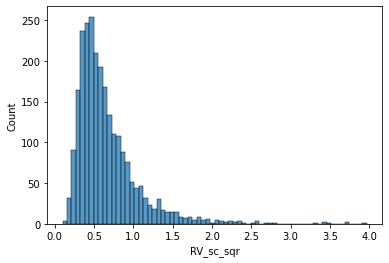

In [154]:
sns.histplot(data['RV_sc_sqr'], kde=False)

Assumptions of two-way ANOVA tests:

$1/$ Linearity ($E(Y|X_{1}=j,X_{2}=k)=\mu_{j}$  for $j=1,...,5$, $k=1,...,5$): the residual plot suggests that linearity could hold and the discussion of relationship of residuals and fitted values above further consolidates this claim. Thus, this assumption may be met.

$2/$ Exogeneity ($E(\varepsilon|X_{1}=j,X_{2}=k)=0$ for $j=1,...,5$, $k=1,...,4$): the residuals against predicted values plot suggests that $E(\varepsilon|X_{1}=j,X_{2}=k)=0$ for $j=1,...,5$, $k=1,...,4$. Furthermore, the mean of residuals in each group is also approximately zero as shown above, which suggests this assumption may be met.

$3/$ The data are independent and identically distributed in each group: financial theory does say (strongly) that market efficiency implies that returns should be independent and identically distributed ("strong efficiency") and certainly uncorrelated ("weak efficiency") over time. Thus, the square root of 5 min RV may be independent among groups. Hence, this assumption may be met.

However, it should be noted that from the time series plot, the RV displays a strong pattern over time: there are periods of persistent high volatility and at other times periods of  persistent low volatility. High values of the RV tend to follow high values of the RV; and vice versa. Thus, this may be detrimental to the validity of the assumption and in such case, data thinning may have helped remove any autocorrelation here.

$4/$ The data in each group have finite forth moments ($E(Y_{j,k}^4)<\infty$ for $j=1,...,5$, $k=1,...,4$): according to the numerical summary, most of groups have high right-skewness and high Fisher's kurtosis with values much larger than 0. Hence, this may cast doubt on the finite value of the forth moments of the square root of 5 min RV across groups. However, it should be noted that the financial nature of volatility states that its value has a lower bound of zero and should have a certain upper bound. Thus, the square root of 5 min RV is a bounded random variable. Thus, this assumption may be met but the unusual large value of kurtosis should be monitored cautiously.

$5/$ $n_{j,k} \geq 30$ for $j=1,...,5$, $k=1,...,4$: according to the numerical summary for each group, the number of observations in groups are 121, 127, 122, 124, 121, 138, 133, 131, 123, 131, 129, 125, 117, 134, 118, 133, 119, 107, 131, and 116. This assumption is met. 

$6/$ Equality of variances across the groups ($Var(Y|X_{1}=j,X_{2}=k)= \sigma^2$ for $j=1,...,5$, $k=1,...,4$): according to the residuals against predicted values plot, the variance of the residuals seems to remain constant due to  equally spread residuals around a horizontal line without distinct patterns. Nevertheless, the sample variance of residuals for each group are quite varied but this may or may not be due to the influence of outliers, suggesting this assumption may be satisfied in general. However, to be cautious, a Het-robust version of this ANOVA test should be conducted.

<span style="color:red">Two-way ANOVA test for log of the square root of 5 min RV and day of the week & season of the year</span>

In [155]:
reg3_log = smf.ols(formula='log_RV_sc_sqr ~ C(day_of_week)+C(Season)+C(day_of_week):C(Season)', data=data).fit()
reg3_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          log_RV_sc_sqr   R-squared:                       0.058
Model:                            OLS   Adj. R-squared:                  0.051
Method:                 Least Squares   F-statistic:                     8.004
Date:                Fri, 07 May 2021   Prob (F-statistic):           5.10e-22
Time:                        14:50:31   Log-Likelihood:                -1768.9
No. Observations:                2500   AIC:                             3578.
Df Residuals:                    2480   BIC:                             3694.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Intercept                             -0.6181      0.045    -13.792      0.000      -0.706      -0.530
C(day_of_week)[T.1]                    0.0651      0.063      1.027      0.304      -0.059       0.189
C(day_of_week)[T.2]                    0.0480      0.063      0.761      0.447      -0.076       0.172
C(day_of_week)[T.3]                    0.0681      0.064      1.066      0.287      -0.057       0.193
C(day_of_week)[T.4]                   -0.3168      0.064     -4.978      0.000      -0.442      -0.192
C(Season)[T.2]                         0.1358      0.063      2.169      0.030       0.013       0.259
C(Season)[T.3]                         0.1289      0.063      2.038      0.042       0.005       0.253
C(Season)[T.4]                         0.1238      0.063      1.965      0.050       0.000       0.247
C(day_of_week)[T.1]:C(Season)[T.2]    -0.1128      0.088     -1.286      0.198      -0.285       0.059
C(day_of_week)[T.2]:C(Season)[T.2]    -0.0542      0.088     -0.616      0.538      -0.227       0.118
C(day_of_week)[T.3]:C(Season)[T.2]    -0.1163      0.088     -1.316      0.188      -0.290       0.057
C(day_of_week)[T.4]:C(Season)[T.2]     0.0877      0.091      0.967      0.334      -0.090       0.266
C(day_of_week)[T.1]:C(Season)[T.3]    -0.0740      0.089     -0.836      0.403      -0.248       0.100
C(day_of_week)[T.2]:C(Season)[T.3]    -0.0468      0.089     -0.528      0.597      -0.221       0.127
C(day_of_week)[T.3]:C(Season)[T.3]    -0.0311      0.090     -0.345      0.730      -0.208       0.146
C(day_of_week)[T.4]:C(Season)[T.3]     0.2940      0.089      3.309      0.001       0.120       0.468
C(day_of_week)[T.1]:C(Season)[T.4]    -0.0700      0.088     -0.791      0.429      -0.243       0.104
C(day_of_week)[T.2]:C(Season)[T.4]     0.0429      0.089      0.482      0.630      -0.131       0.217
C(day_of_week)[T.3]:C(Season)[T.4]    -0.0041      0.089     -0.046      0.963      -0.178       0.170
C(day_of_week)[T.4]:C(Season)[T.4]     0.0186      0.090      0.207      0.836      -0.158       0.195
==============================================================================
Omnibus:                       90.628   Durbin-Watson:                   0.753
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              100.716
Skew:                           0.463   Prob(JB):                     1.35e-22
Kurtosis:                       3.331   Cond. No.                         28.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

$\widehat{log(\sqrt{\text{5 min RV}})} = -0.6181 + 0.0651\times D_{\text{Tues}}+0.0480\times D_{\text{Wed}}+0.0681\times D_{\text{Thurs}}-0.3168\times D_{\text{Thurs}}+0.1358\times D_{\text{Autumn}}+0.1289\times D_{\text{Winter}}+0.1238\times D_{\text{Spring}}-0.1128\times D_{\text{Tues}}\times D_{\text{Autumn}}-0.0542\times D_{\text{Wed}}\times D_{\text{Autumn}}-0.1163\times D_{\text{Thurs}}\times D_{\text{Autumn}}+0.0877\times D_{\text{Thurs}}\times D_{\text{Autumn}}-0.0740\times D_{\text{Tues}}\times D_{\text{Winter}}-0.0468\times D_{\text{Wed}}\times D_{\text{Winter}}-0.0311\times D_{\text{Thurs}}\times D_{\text{Winter}}+0.2940\times D_{\text{Thurs}}\times D_{\text{Winter}}-0.0700\times D_{\text{Tues}}\times D_{\text{Spring}}+0.0429\times D_{\text{Wed}}\times D_{\text{Spring}}-0.0041\times D_{\text{Thurs}}\times D_{\text{Spring}}+0.0186\times D_{\text{Thurs}}\times D_{\text{Spring}}$


Other than that, considering 4 tests regarding $H_0$: $\beta_{i} =0$ vs $H_1$: $\beta_{i} \neq 0$ for i=1,2,...,19 at $\alpha = 0.05$, among all provided p-values for each i, only p-value for i=4,5,6,15 are lower than 0.05, which are 0.000, 0.030, 0.042, and 0.001 respectively implying that we can only reject the null hypotheses in case i=4,5,6,15 and that the $D_{\text{Fri}}$, $D_{\text{Autumn}}$, $D_{\text{Winter}}$, and $D_{\text{Fri}}\times D_{\text{Winter}}$ and square root of 5 min RV are significantly linearly related while the linear relationships between the square root of 5 min RV and other mentioned dummy and interaction variables and are insignificant.

In [156]:
data['fit3_log']=reg3_log.fittedvalues
for i in ('Mon','Tues','Wed','Thurs','Fri'):
    for j in ('Summer','Autumn','Winter','Spring'):
        print('----------------------------------------------------------')
        print('If the observation is in {}-{} group, its predicted log of square root of 5 min RV value should be {}'.format(i,j,np.mean(data.loc[data[i]+data[j]==2, 'fit3_log'])))
        print('----------------------------------------------------------')

----------------------------------------------------------
If the observation is in Mon-Summer group, its predicted log of square root of 5 min RV value should be -0.6180654881006408
----------------------------------------------------------
----------------------------------------------------------
If the observation is in Mon-Autumn group, its predicted log of square root of 5 min RV value should be -0.48226616130169425
----------------------------------------------------------
----------------------------------------------------------
If the observation is in Mon-Winter group, its predicted log of square root of 5 min RV value should be -0.48918535541907315
----------------------------------------------------------
----------------------------------------------------------
If the observation is in Mon-Spring group, its predicted log of square root of 5 min RV value should be -0.4942959458807224
----------------------------------------------------------
------------------------------

Back-transform predictions

In [157]:
y=np.zeros((5,4))
i1=0
i2=0
for i in ['Mon','Tues','Wed','Thurs','Fri']:
    for j in ['Summer','Autumn','Winter','Spring']:
        y[i1,i2]= np.exp(np.mean(data.loc[data[i]+data[j]==2, 'fit3_log']))
        print('the back-transform predicted value for oberservation in group {}-{} is {}%'.format(i,j,y[i1,i2]))
        i2=i2+1
    i2=0
    i1=i1+1
y

the back-transform predicted value for oberservation in group Mon-Summer is 0.5389861047442879%
the back-transform predicted value for oberservation in group Mon-Autumn is 0.6173827165070074%
the back-transform predicted value for oberservation in group Mon-Winter is 0.6131256702952483%
the back-transform predicted value for oberservation in group Mon-Spring is 0.6100002293198183%
the back-transform predicted value for oberservation in group Tues-Summer is 0.5752413812851993%
the back-transform predicted value for oberservation in group Tues-Autumn is 0.588623933373567%
the back-transform predicted value for oberservation in group Tues-Winter is 0.6076816268511523%
the back-transform predicted value for oberservation in group Tues-Spring is 0.6070404725221618%
the back-transform predicted value for oberservation in group Wed-Summer is 0.5654963343789047%
the back-transform predicted value for oberservation in group Wed-Autumn is 0.6135528756729964%
the back-transform predicted value fo

array([[0.5389861 , 0.61738272, 0.61312567, 0.61000023],
       [0.57524138, 0.58862393, 0.60768163, 0.60704047],
       [0.56549633, 0.61355288, 0.61385543, 0.66802387],
       [0.57698337, 0.58834519, 0.63626556, 0.65033227],
       [0.39263726, 0.49097924, 0.59931819, 0.45270999]])

In [158]:
data['fit3_log_real']=np.exp(reg3_log.fittedvalues)

In [159]:
RSS = np.sum((data['fit3_log_real']-data['RV_sc_sqr'])**2)
MSE = RSS/(2500-20)
SER = MSE**0.5
TSS = (np.std(data['RV_sc_sqr'])**2)*2500
R_squared = 1 - (RSS/TSS)
R_squared_adjusted = 1 - (RSS/TSS)*((2500-1)/(2500-20))
print(SER, R_squared, R_squared_adjusted)


0.4043774682783517 -0.009380137726564985 -0.01711329200753453


Normal predictions

In [160]:
y=np.zeros((5,4))
i1=0
i2=0
for i in ['Mon','Tues','Wed','Thurs','Fri']:
    for j in ['Summer','Autumn','Winter','Spring']:
        y[i1,i2]= np.exp(np.mean(data.loc[data[i]+data[j]==2, 'fit3_log']))*np.exp(reg3_log.mse_resid/2)
        print('the normal predicted value for oberservation in group {}-{} is {}%'.format(i,j,y[i1,i2]))
        i2=i2+1
    i2=0
    i1=i1+1
y

the normal predicted value for oberservation in group Mon-Summer is 0.6086168874035499%
the normal predicted value for oberservation in group Mon-Autumn is 0.6971414363928929%
the normal predicted value for oberservation in group Mon-Winter is 0.6923344289540591%
the normal predicted value for oberservation in group Mon-Spring is 0.6888052170847991%
the normal predicted value for oberservation in group Tues-Summer is 0.6495559271414167%
the normal predicted value for oberservation in group Tues-Autumn is 0.6646673504709707%
the normal predicted value for oberservation in group Tues-Winter is 0.6861870779432063%
the normal predicted value for oberservation in group Tues-Spring is 0.6854630938764172%
the normal predicted value for oberservation in group Wed-Summer is 0.6385519326719777%
the normal predicted value for oberservation in group Wed-Autumn is 0.692816824334939%
the normal predicted value for oberservation in group Wed-Winter is 0.6931584674416829%
the normal predicted value fo

array([[0.60861689, 0.69714144, 0.69233443, 0.68880522],
       [0.64955593, 0.66466735, 0.68618708, 0.68546309],
       [0.63855193, 0.69281682, 0.69315847, 0.75432484],
       [0.65152296, 0.66435259, 0.71846373, 0.73434769],
       [0.44336146, 0.55440809, 0.67674318, 0.51119489]])

In [161]:
data['fit3_log_real']=np.exp(reg3_log.fittedvalues)*np.exp(reg3_log.mse_resid/2)

In [162]:
RSS = np.sum((data['fit3_log_real']-data['RV_sc_sqr'])**2)
MSE = RSS/(2500-20)
SER = MSE**0.5
TSS = (np.std(data['RV_sc_sqr'])**2)*2500
R_squared = 1 - (RSS/TSS)
R_squared_adjusted = 1 - (RSS/TSS)*((2500-1)/(2500-20))
print(SER, R_squared, R_squared_adjusted)


0.39610658366975504 0.03148806155644779 0.0240680104151465


Duan predictions

In [163]:
E=np.mean(np.exp(reg3_log.resid))
y=np.zeros((5,4))
i1=0
i2=0
for i in ['Mon','Tues','Wed','Thurs','Fri']:
    for j in ['Summer','Autumn','Winter','Spring']:
        y[i1,i2]= np.exp(np.mean(data.loc[data[i]+data[j]==2, 'fit3_log']))*E
        print('the normal predicted value for oberservation in group {}-{} is {}%'.format(i,j,y[i1,i2]))
        i2=i2+1
    i2=0
    i1=i1+1
y

the normal predicted value for oberservation in group Mon-Summer is 0.6139936893318453%
the normal predicted value for oberservation in group Mon-Autumn is 0.7033003049636997%
the normal predicted value for oberservation in group Mon-Winter is 0.6984508302069169%
the normal predicted value for oberservation in group Mon-Spring is 0.6948904396543559%
the normal predicted value for oberservation in group Tues-Summer is 0.6552944034043567%
the normal predicted value for oberservation in group Tues-Autumn is 0.6705393280083236%
the normal predicted value for oberservation in group Tues-Winter is 0.6922491706656024%
the normal predicted value for oberservation in group Tues-Spring is 0.6915187905900813%
the normal predicted value for oberservation in group Wed-Summer is 0.6441931945790449%
the normal predicted value for oberservation in group Wed-Autumn is 0.6989374872907955%
the normal predicted value for oberservation in group Wed-Winter is 0.6992821486301143%
the normal predicted value f

array([[0.61399369, 0.7033003 , 0.69845083, 0.69489044],
       [0.6552944 , 0.67053933, 0.69224917, 0.69151879],
       [0.64419319, 0.69893749, 0.69928215, 0.7609889 ],
       [0.65727881, 0.67022179, 0.72481097, 0.74083526],
       [0.44727832, 0.55930599, 0.68272185, 0.51571102]])

In [164]:
data['fit3_log_real']=np.exp(reg3_log.fittedvalues)*np.mean(np.exp(reg3_log.resid))

In [165]:
RSS = np.sum((data['fit3_log_real']-data['RV_sc_sqr'])**2)
MSE = RSS/(2500-20)
SER = MSE**0.5
TSS = (np.std(data['RV_sc_sqr'])**2)*2500
R_squared = 1 - (RSS/TSS)
R_squared_adjusted = 1 - (RSS/TSS)*((2500-1)/(2500-20))
print(SER, R_squared, R_squared_adjusted)

0.39606763354206553 0.0316785244797938 0.024259932530243944


As it can be seen that among three prediction options, Duan prediction method results in the lowest SER and highest $R^2$ and $R^2_{adjusted}$. Thus, the prediction and model's strength of fit measurement via this method will be used as a benchmark to compare with other models.

It can be seen that as $R^{2} = 0.0317$ and $R^{2}_{\text{adjusted}}=0.0243$, the linear relationship estimated above is statistically weak. Besides, the SER of 0.3961% of the model needs to be examined cautiuosly by financial consultant regarding whether this is significant in this case. 

In [166]:
table3_log= sm.stats.anova_lm(reg3_log, typ=3)
table3_log

,sum_sq,df,F,PR(>F)
Intercept,46.222599,1.0,190.217717,9.512085e-42
C(day_of_week),12.859608,4.0,13.230137,1.146076e-10
C(Season),1.542204,3.0,2.115520,9.620203e-02
C(day_of_week):C(Season),8.092219,12.0,2.775128,9.183371e-04
Residual,602.636003,2480.0,NaN,NaN


The hypotheses here are:

$H_{0}$: $\mu_{1,}=...=\mu_{5,.}$, means are the same across 5 days in the week

$H_{1}$: $H_{1}$: $\exists i,j \in \{1,2,3,4,5\}$, $i \neq j$ and $\mu_{i,.}\neq\mu_{j,.}$, at least two means are different across 5 days in the week

For $\mu_{1,.}$, $\mu_{2,.}$, $\mu_{3,.}$, $\mu_{4,.}$ and $\mu_{5,.}$ are the mean of the log of the square root of 5 min RV on Monday, Tuesday, Wednesday, Thursday, and Friday respectively.

We choose $\alpha=0.05$ as standard. 

The test statistics is $F_{\text{stat}_{1}} =13.230137$, which has a F distribution with $m_{1}-1 = 5-1=4$ degrees of freedom in numerator and $n-m_{1}m_{2}=2500-5\times4=2480$ degrees of freedom in denominator, , if the null of equality of means is, and the LSA 1-6 assumptions are also, true. 

The chance that the resulting F value would be more extreme than 13.230137, in the direction of the alternative hypothesis which is more or greater than, is very close to 0. Specifically, the p-value is $P(F_{4,2480} > 13.230137) = 1.146076\times10^{-10}$. 

Hence, such p-value is $< 0.05$, it is statistically sufficient for us to reject the null and conclude that the mean RV of difference seasons of a year is difference from each other. In other words, the root square of 5 min RV may be affected by season of the year.

The hypotheses here are:

$H_{0}$: $\mu_{.,1}=...=\mu_{.,4}$, means are the same across 4 seasons

$H_{1}$: $\exists i,j \in \{1,2,3,4\}$, $i \neq j$ and $\mu_{.,i}\neq\mu_{.,j}$, at least two means are different across 4 seasons

For $\mu_{.,1}$, $\mu_{.,2}$, $\mu_{.,3}$, and $\mu_{.,4}$ are the mean of the log of the square root of 5 min RV in Summer, Autumn, Winter, and Spring respectively.

We choose $\alpha=0.05$ as standard. 

The test statistics is $F_{\text{stat}_{2}} =2.115520	$, which has a F distribution with $m_{2}-1 = 4-1=3$ degrees of freedom in numerator and $n-m_{1}m_{2}=2500-5\times4=2480$ degrees of freedom in denominator, , if the null of equality of means is, and the LSA 1-6 assumptions are also, true. 

The chance that the resulting F value would be more extreme than 2.115520	, in the direction of the alternative hypothesis which is more or greater than, is very close to 0. Specifically, the p-value is $P(F_{3,2480} > 2.115520) = 0.09620203$. 

Hence, such p-value is $> 0.05$, it is not statistically sufficient for us to reject the null and conclude that the mean RV of difference seasons of a year is not statistically difference from each other. In other words, the root square of 5 min RV may be not affected by season of the year.

The hypotheses here are:

$H_{0}$: $\mu_{\text{i,1}}=...=\mu_{\text{i,4}}$ $\forall i \in \{1,2,3,4,5\}$ and $\mu_{\text{1,j}}=...\mu_{\text{5,j}}$ $\forall j \in \{1,2,3,4\}$ all interaction effects between day of the week and season of the year are equal to 0

$H_{1}$: at least one of the above pairs (pair with either the same i index or j index) are different, at least one interaction effect between day of the week and season of the year is different from 0

For $\mu_{i,j}$ is the mean of the log of the square root of 5 min RV in $i$ corresponding day and $j$ corresponding season. 

We choose $\alpha=0.05$ as standard. 

The test statistics is $F_{\text{stat}_{3}} =2.775128$, which has a F distribution with $(m_{2}-1)(m_{2}-1) = (5-1)\times(4-1)=12$ degrees of freedom in numerator and $n-m_{1}m_{2}=2500-5\times4=2480$ degrees of freedom in denominator, , if the null of 0 interaction effects are, and the LSA 1-6 assumptions are also, true. 

The chance that the resulting F value would be more extreme than 2.775128, in the direction of the alternative hypothesis which is more or greater than, is very close to 0. Specifically, the p-value is $P(F_{12,2480} > 2.775128) = 9.183371\times10^{-04}$. 

Hence, such p-value is $< 0.05$, it is statistically sufficient for us to reject the null and conclude that there is at least one interaction among days of the week and seasons of the year in determining the log of the square root of 5 min RV. In other word, day of the week and season of the year may influence each other impact on the square root of 5 min RV.

<span style="color:red">Assumptions assessment</span>

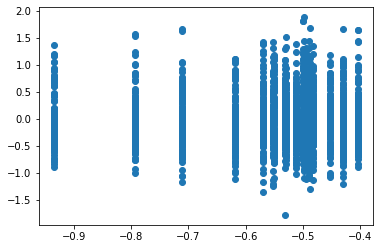

In [167]:
fit3_log = reg3_log.fittedvalues
res3_log = reg3_log.resid
plt.scatter(fit3_log,res3_log)

The residuals in the above graphs seem to have changing variance across 20 groups. However, the root of this phenomenon may be the existence of small number of outliers in each group. Thus, this may not harm the assumption of constant variance.

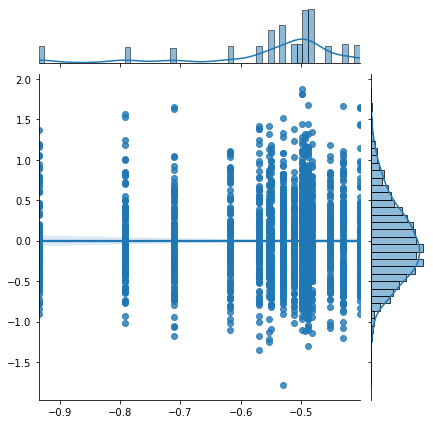

In [168]:
sns.jointplot(x=fit3_log, y=res3_log, kind="reg")

In [169]:
p, p_value = stats.pearsonr(fit3_log,res3_log)
p, p_value

(3.2612801348363973e-16, 1.0000000000028155)

From the above plot, equally spread residuals around a horizontal line without distinct patterns, that is a good indication of constant variance across groups. On the other hand, the regression line of estimated residuals to the fitted values is a perfect horizontal line through the origin $O(0,0)$ associated with the result of testing hypotheses $H_{\text{0}}: \rho = 0$ versus $H_{\text{1}}: \rho \neq 0$, the p-value of nearly one claim that this correlation coefficient is significantly around zero. Thus, the true linearity relationship may be assured.

In [170]:
data['res3_log']=res3_log

In [171]:
for i in ['Mon','Tues','Wed','Thurs','Fri']:
    for j in ['Summer','Autumn','Winter','Spring']:
        print('----------------------------------------------------------')
        print('Numerical summary of observations in group {} and {}'.format(i,j))
        print(stats.describe(data.loc[(data[i]+data[j])==2, 'log_RV_sc_sqr']))
        print('----------------------------------------------------------')

----------------------------------------------------------
Numerical summary of observations in group Mon and Summer
DescribeResult(nobs=121, minmax=(-1.7269849768542604, 0.48440049593435286), mean=-0.6180654881006419, variance=0.24672718876900132, skewness=0.29652501032901346, kurtosis=-0.219575440545142)
----------------------------------------------------------
----------------------------------------------------------
Numerical summary of observations in group Mon and Autumn
DescribeResult(nobs=127, minmax=(-1.6266115616965235, 0.8636081487044595), mean=-0.48226616130169303, variance=0.20988246817521222, skewness=0.2657276801074155, kurtosis=0.006932669656835699)
----------------------------------------------------------
----------------------------------------------------------
Numerical summary of observations in group Mon and Winter
DescribeResult(nobs=122, minmax=(-1.5948592618619777, 0.9511578745426709), mean=-0.4891853554190723, variance=0.27427067315078374, skewness=0.193248

In [172]:
for i in ['Mon','Tues','Wed','Thurs','Fri']:
    for j in ['Summer','Autumn','Winter','Spring']:
        print('----------------------------------------------------------')
        print('Numerical summary of residuals of observations in group {} and {}'.format(i,j))
        print(stats.describe(data.loc[(data[i]+data[j])==2, 'res3_log']))
        print('----------------------------------------------------------')

----------------------------------------------------------
Numerical summary of residuals of observations in group Mon and Summer
DescribeResult(nobs=121, minmax=(-1.1089194887536182, 1.1024659840349949), mean=2.1103412864775704e-16, variance=0.24672718876900127, skewness=0.29652501032901357, kurtosis=-0.21957544054514067)
----------------------------------------------------------
----------------------------------------------------------
Numerical summary of residuals of observations in group Mon and Autumn
DescribeResult(nobs=127, minmax=(-1.1443454003948306, 1.3458743100061525), mean=-4.589504629355962e-17, variance=0.20988246817521222, skewness=0.2657276801074155, kurtosis=0.006932669656835699)
----------------------------------------------------------
----------------------------------------------------------
Numerical summary of residuals of observations in group Mon and Winter
DescribeResult(nobs=122, minmax=(-1.105673906442905, 1.4403432299617434), mean=3.003062279723784e-16, v

<AxesSubplot:xlabel='log_RV_sc_sqr', ylabel='Count'>

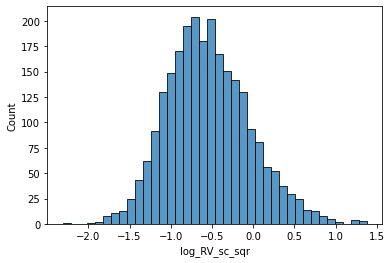

In [173]:
sns.histplot(data['log_RV_sc_sqr'], kde=False)

Assumptions of two-way ANOVA tests:

$1/$ Linearity ($E(Y|X_{1}=j,X_{2}=k)=\mu_{j}$  for $j=1,...,5$, $k=1,...,4$): the residual plot suggests that linearity could hold and the discussion of relationship of residuals and fitted values above further consolidates this claim. Thus, this assumption may be met.

$2/$ Exogeneity ($E(\varepsilon|X_{1}=j,X_{2}=k)=0$ for $j=1,...,5$, $k=1,...,4$): the residuals against predicted values plot suggests that $E(\varepsilon|X_{1}=j,X_{2}=k)=0$ for $j=1,...,5$, $k=1,...,4$. Furthermore, the mean of residuals in each group is also approximately zero as shown above, which suggests this assumption may be met.

$3/$ The data are independent and identically distributed in each group: financial theory does say (strongly) that market efficiency implies that returns should be independent and identically distributed ("strong efficiency") and certainly uncorrelated ("weak efficiency") over time. Thus, the square root of 5 min RV may be independent among groups. Furthermore, data thinning may have helped remove any autocorrelation here. Hence, this assumption may be met.

However, it should be noted that from the time series plot, the log of RV displays a strong pattern over time: there are periods of persistent high volatility and at other times periods of  persistent low volatility. High values of the log of RV tend to follow high values of the log of RV; and vice versa. Thus, this may be detrimental to the validity of the assumption and in such case, data thinning may have helped remove any autocorrelation here.

$4/$ The data in each group have finite forth moments ($E(Y_{j,k}^4)<\infty$ for $j=1,...,5$, $k=1,...,4$): according to the numerical summary, most of groups have right-skewness with values around 0  and Fisher's kurtosis with values around 0. Besides, it should be noted the fact that the financial nature of return volatility allows the square root of 5 min RV values have the lower bound of 0, which is hardly reached in real life situation and are likely to have an upper bound. Thus, the log of the square root of 5 min RV values may be considered as a bounded random variable. Thus, this assumption may be met.

$5/$ $n_{j,k} \geq 30$ for $j=1,...,5$, $k=1,...,4$: according to the numerical summary for each group, the number of observations in groups are 121, 127, 122, 124, 121, 138, 133, 131, 123, 131, 129, 125, 117, 134, 118, 133, 119, 107, 131, and 116. This assumption is met. 

$6/$ Equality of variances across the groups ($Var(Y|X_{1}=j,X_{2}=k)= \sigma^2$ for $j=1,...,5$, $k=1,...,4$): according to the residuals against predicted values plot, the variance of the residuals seems to remain constant due to  equally spread residuals around a horizontal line without distinct patterns. Furthermore, the sample variance of residuals for each group are quite varied but this may or may not be due to the influence of outliers, suggesting this assumption may be satisfied in general. However, to be cautious, a Het-robust version of this ANOVA test should be conducted.

<span style="color:red">Comparison results of the tests using the log transformation and the tests not using log transformation</span>

$1/$ Strength of fit: in this aspect, the log transformation has degenerated the model slightly with $R^{2} = 0.0317$, SER=0.3961% and $R^{2}_{\text{adjusted}}=0.0242$ while those of the model without any transformation are $R^{2} = 0.033$ and $R^{2}_{\text{adjusted}}=0.026$, SER=0.3958%. Hence, the non-transformed model is better choice from this perspective.

$2/$ Goodness of fit: both tests have their assumptions satisfied well. Nevertheless, regarding the forth moment assumption, the log transformation can ease the influence of outliers via a much significant lower level in kurtosis across 5 groups and thus, makes this assumption is more reliable in the test using log transformation.

$3/$ Two-way ANOVA test's result: although the two models come up with different F statistics and p-values, both results all agree that  the root square of 5 min RV may be affected by day of the week, the root square of 5 min RV may be not affected by season of the year. Meanwhile, the log transformation model concludes that there should have interaction between day of the week and season of the year in impacting the square root of 5 min RV, which is rejected by the model not using log transformation.

# Part 5: Report Summary

As consider the either day of the week or season of the year separately, its impact on the square root of 5 min RV is recognized via the results from two one-way ANOVA tests and those results are consistent before and after using log transformation on the square root of 5 min RV. Considering the differences assessment, while the log transformation data accepts the differences between Summer and Autumn, Summer and Winter, Summer and Spring are statistically significant and rejects the statistical differences of three remaining pairs. Nevertheless, the same analysis with non-transformed data rejects the statistical difference between Summer and Autumn as significant the keeps remaining results the same as those of the analysis conducted for transformed data. Regarding the day of the week, both analyses conducted for transformed and non-transformed agree that the differences between Friday and Monday, Friday and Tuesday, Friday and Wednesday, Friday and Thursday are statistically significant and rejects the statistical differences of six remaining pairs. However, as the models with the simultaneous existence of day of the week and season of the year are considered, there is no difference in the means of the RV and means of log of RV across 4 seasons. Furthermore, while the non-transformed model confirms no interaction between the day of the week and season of the year, the log-transformed model state that there should be at least one interaction exists. As discuss above, since the non-transformed data's distribution is very positive skewed and suffers outliers, the log-transformed data is a more reliable input for one-way ANOVA tests and the results from those tests are more trustworthy.